# Image Text Extraction and Information Retrieval

## The Question

Being able to take pictures of text, recognize, convert into computer text, and search either typed or hand-written is a very interesting and useful concept.
**How can we use python image processing and information retrieval libraries to extract text from images and search through the results with specific queries?**

## The Data

Our data consists of **typed and hand-written document images and scans**. We created a dataset that is combined from multiple other datasets. It consists of approximately **1509 data points.**

## The Approach

Since all these images have different document styles and structures, we want to see how well the image text detection library we're using will be able to convert the document into computer text thus allowing us to search through the documents. We will not be implementing the document image word extraction or the search engine from scratch, but we will be using multiple libraries in order to see how these machine learning and natural language processing concepts and libraries work.

## Our Hypothesis

Since some characters share similar features with other characters, and handwritten characters are less consistent than typed characters, we expect a higher accuracy rate when we convert images with typed text to regular text than when we convert images with handwritten text to regular text.

## Why Bother?

Teaching a machine to recognize physical typed and hand-written documents from pictures and scans as well as being able to search through these documents is a very important and useful machine learning concept.

There are many applications such as being able to scan these documents into a database and being able to search for information within the documents.

## Basic Setup

### PIL, Pytesseract, Pandas, and Elasticsearch

We first loaded in the machine learning libraries. **PIL** allows us to process the images. **Pytesseract** allows us to convert the text in the image into a text string. **Pandas** allows us to manipulate data frames easily. **Elasticsearch** allows us to initialize a search engine for our data.

In [4]:
!pip install pytesseract
!pip install pandas
!pip install elasticsearch

In [10]:
# adds image processing capabilities
from PIL import Image

# will convert the image text into a text string
import pytesseract

# allows us to open files
import os

# allows us to manipulate data frames easily
import pandas as pd

# allows us to initialize a search engine for our data
from elasticsearch import Elasticsearch, helpers
es = Elasticsearch([{'host': 'localhost', 'port': 9200}])

# allows us to convert a dataframe to csv format
import csv

# provides access to some ariables and functions from the interpreter
import sys

# allows us to displey images
from IPython.display import Image, display

## The Data

We are working with multiple datasets that we have combined into one for ease of use.

The first dataset in Data/Typed is from the [FUNSD dataset](https://guillaumejaume.github.io/FUNSD/)

Example data:

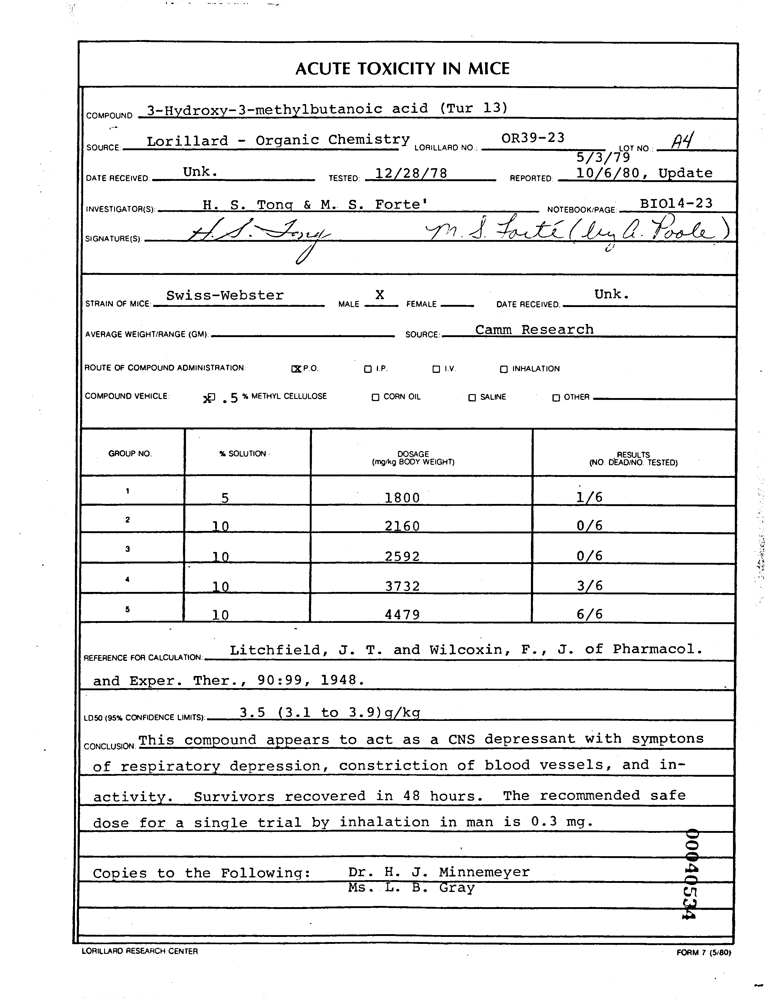

In [28]:
display(Image(filename="Data/Typed/00040534.png"))

The second dataset in Data/Written (png files) is from the [IAM On-Line Handwriting Database](https://fki.tic.heia-fr.ch/databases/iam-on-line-handwriting-database)

Example Data:

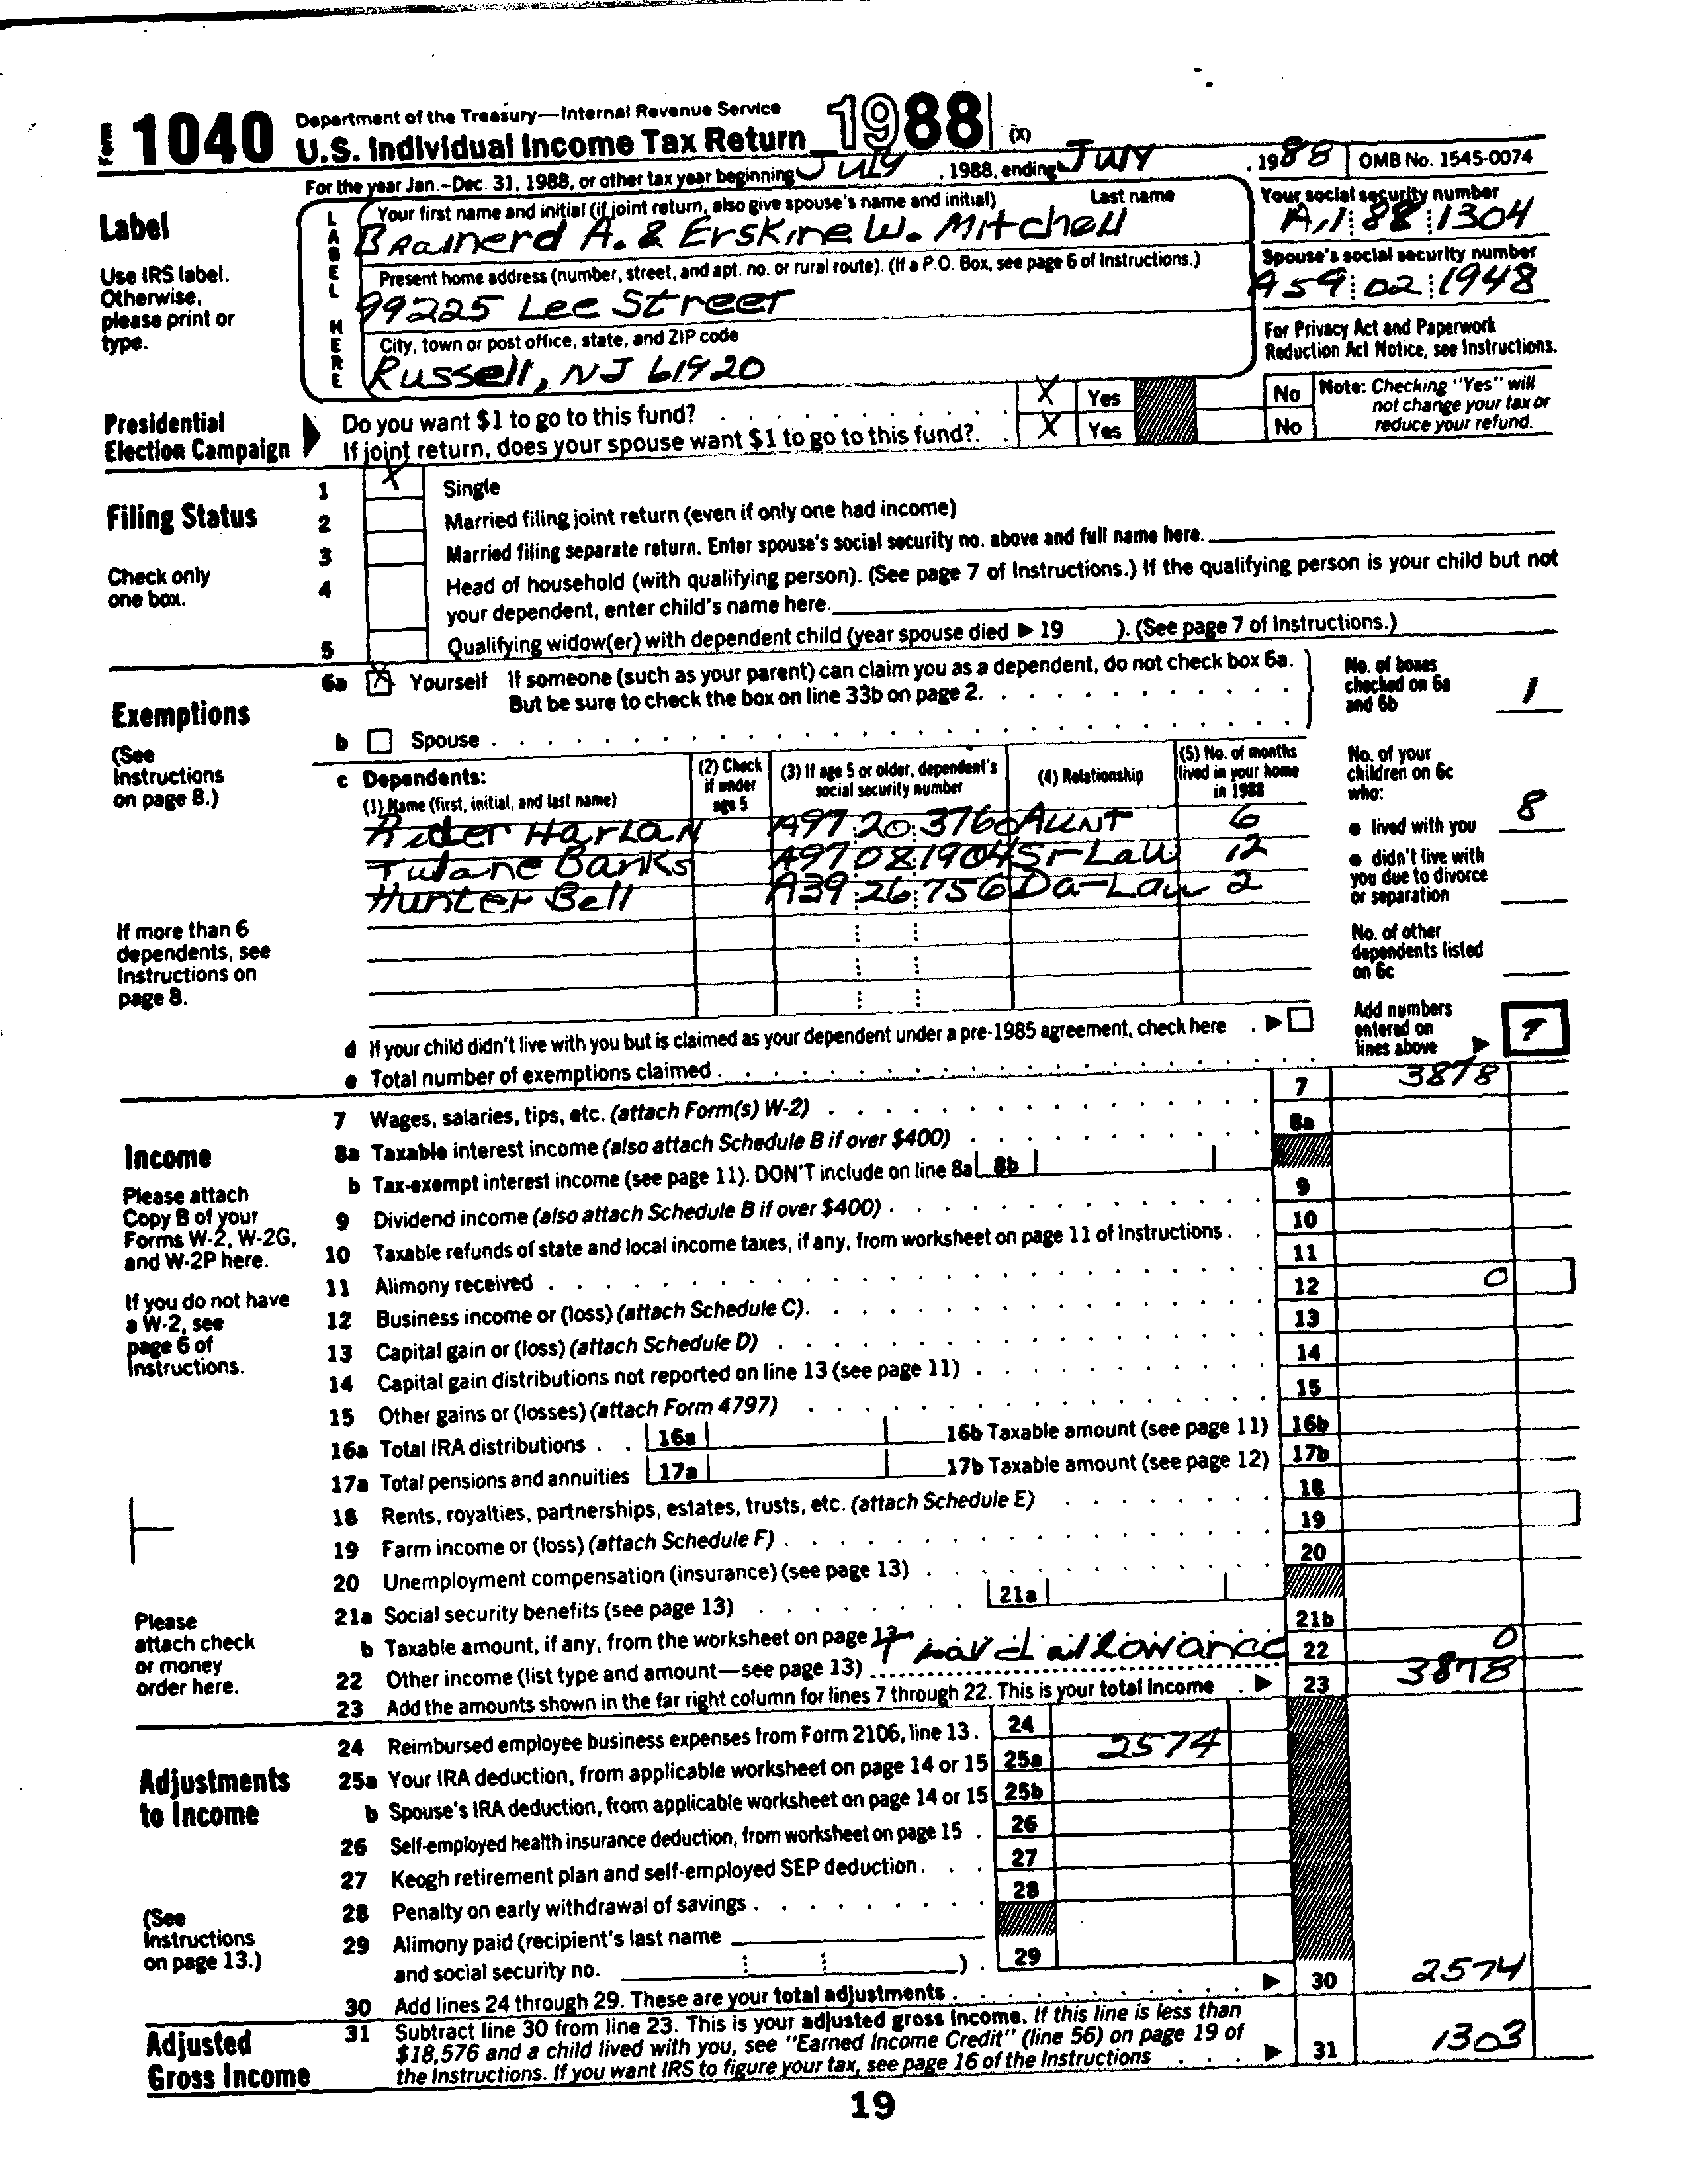

In [29]:
display(Image(filename="Data/Written/r0000_00.png"))

The third dataset in Data/Written (jpg files) is from [GNHK: A Dataset for English Handwriting in the Wild](https://goodnotes.com/gnhk/)

Example data:

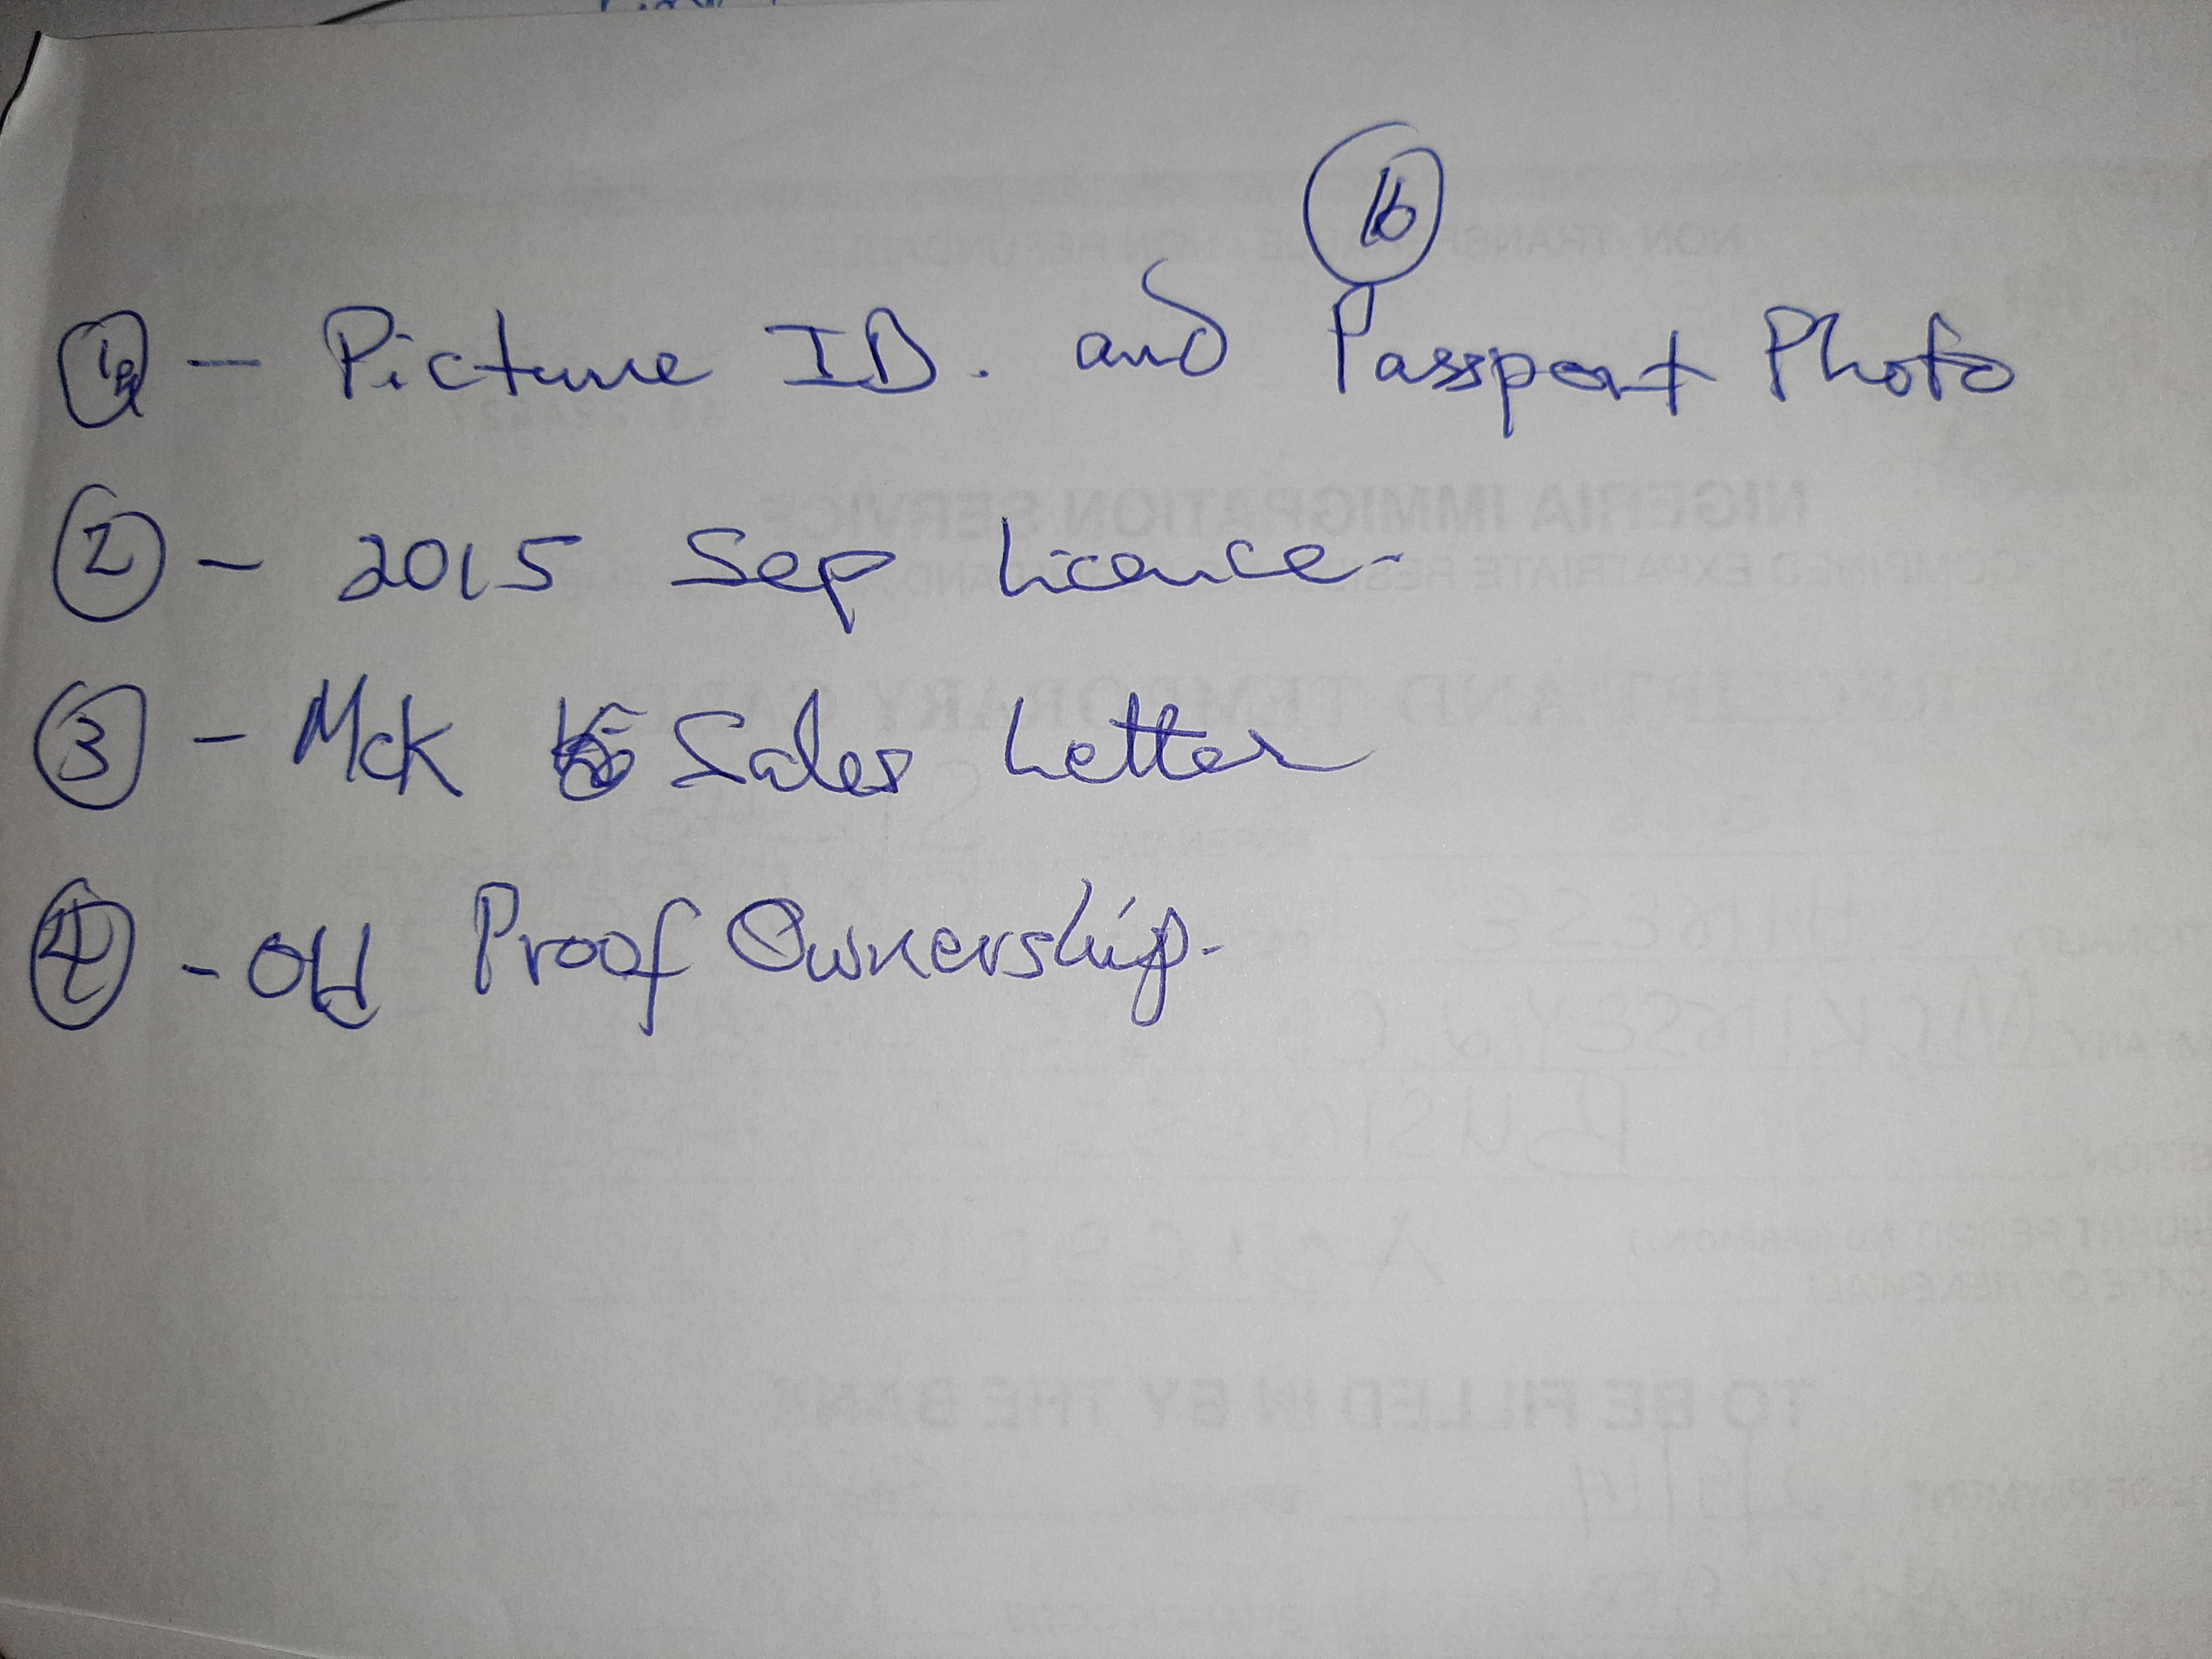

In [30]:
display(Image(filename="Data/Written/eng_AF_001.jpg"))

**Do you see the differences between all of these documents from the various datasets?**
**Can you think of a way that this data can be converted into text on your computer?**

## Convert Documents

We start off by creating an empty list named *images* for storing the source path of each image and an empty list named *results* for storing the results of converting each image to text.The image data is stored in two separate folders, one for images with typed text and one for images with handwritten text. For each image in these two folders, we append the pathname to *images*, open the image using Image class from the PIL module, convert the image text to string text, and append the extracted string text to *results*.
#### Only run if you intend to create a new datastore since it takes about an hour to run.

In [ ]:
#list for storing each image and it's extracted text
images = []
results = []

for filename in os.listdir('Data/Typed'):
    if filename.endswith('.png'):
        with open(os.path.join('Data/Typed', filename)) as f:
            images.append('Data/Typed/' + filename)
            # assigning an image from the source path
            img = Image.open('Data/Typed/' + filename)
            # converts the image to result and saves it into result variable
            result = pytesseract.image_to_string(img)
            results.append(result)

for filename in os.listdir('Data/Written'):
    if filename.endswith('.jpg'):
        with open(os.path.join('Data/Written', filename)) as f:
            images.append('Data/Written/' + filename)
            # assigning an image from the source path
            img = Image.open('Data/Written/' + filename)
            # converts the image to result and saves it into result variable
            result = pytesseract.image_to_string(img)
            results.append(result)
    if filename.endswith('.png'):
        with open(os.path.join('Data/Written', filename)) as f:
            images.append('Data/Written/' + filename)
            # assigning an image from the source path
            img = Image.open('Data/Written/' + filename)
            # converts the image to result and saves it into result variable
            result = pytesseract.image_to_string(img)
            results.append(result)

## Store in Datastore

Here we create and convert a dictionary that stores the images and results into a Pandas DataFrame. Then we export the DataFrame to a csv file.

#### Only run after running **Convert Documents**.

In [ ]:
df = pd.DataFrame({
        'image': images,
        'result': results
})

df.to_csv('output.csv', index=False)

## Elasticsearch

Download Elasticsearch to your computer here: https://www.elastic.co/guide/en/elasticsearch/reference/current/install-elasticsearch.html

Run Elasticsearch by following these steps: https://www.elastic.co/guide/en/elasticsearch/reference/6.8/getting-started-install.html

Here we are creating an Elasticsearch index from the csv created from the data. The data consists of the image file path and the contents of the converted document.

#### Uncomment "es.indices.delete(index='documents')" if you already created the index in a previous run and want to recreate the index.

In [ ]:
with open('output.csv') as f:
    reader = csv.DictReader(f)
    #es.indices.delete(index='documents')
    helpers.bulk(es, reader, index='documents')

Here we get inputted searches from user input which then employs es.search in order to search through creaated index for searches inputted by the user. Once the user exits it outputs the search results.

Search: yes

Image: Data/Written/r0098_06.png

Result:

Page 2

tcp tsetse enim tte tenet

Form 4562 (1988)

FAUT Automobiles, Certain Other Vehicles, Computers, and Property Used for Entertainment, Recreation, or
Amusement (Listed Property).
if you are using the standard mileage rate or deducting vehicle lease expense, complete columns (a) through (d) of Section A, all of
Section B, and Section C if applicable.
Section A.—Depreciation (If automobiles and other listed property placed in service after June 18, 1984, are used 50% or
less in a trade or business, the section 179 deduction is not allowed and depreciation must be
taken using the straight line method over 5 years. For other limitations, see instructions.)

Yes LJ No It “Yes,” is the evidence written? Yes AI No

 

 

 

Do you have evidence to support the business use claimed?

    
     
   
  

     

     
    

   
    
  

   
 
  

  
 
    

    
      

 

Business (d) Cost or . api woe.
ope (b) Date () ‘ | ’ (e) Basi

/Users/cristinalawson/PycharmProjects/Assignment3/venv/lib/python3.9/site-packages/elasticsearch/connection/base.py:208: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.15/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


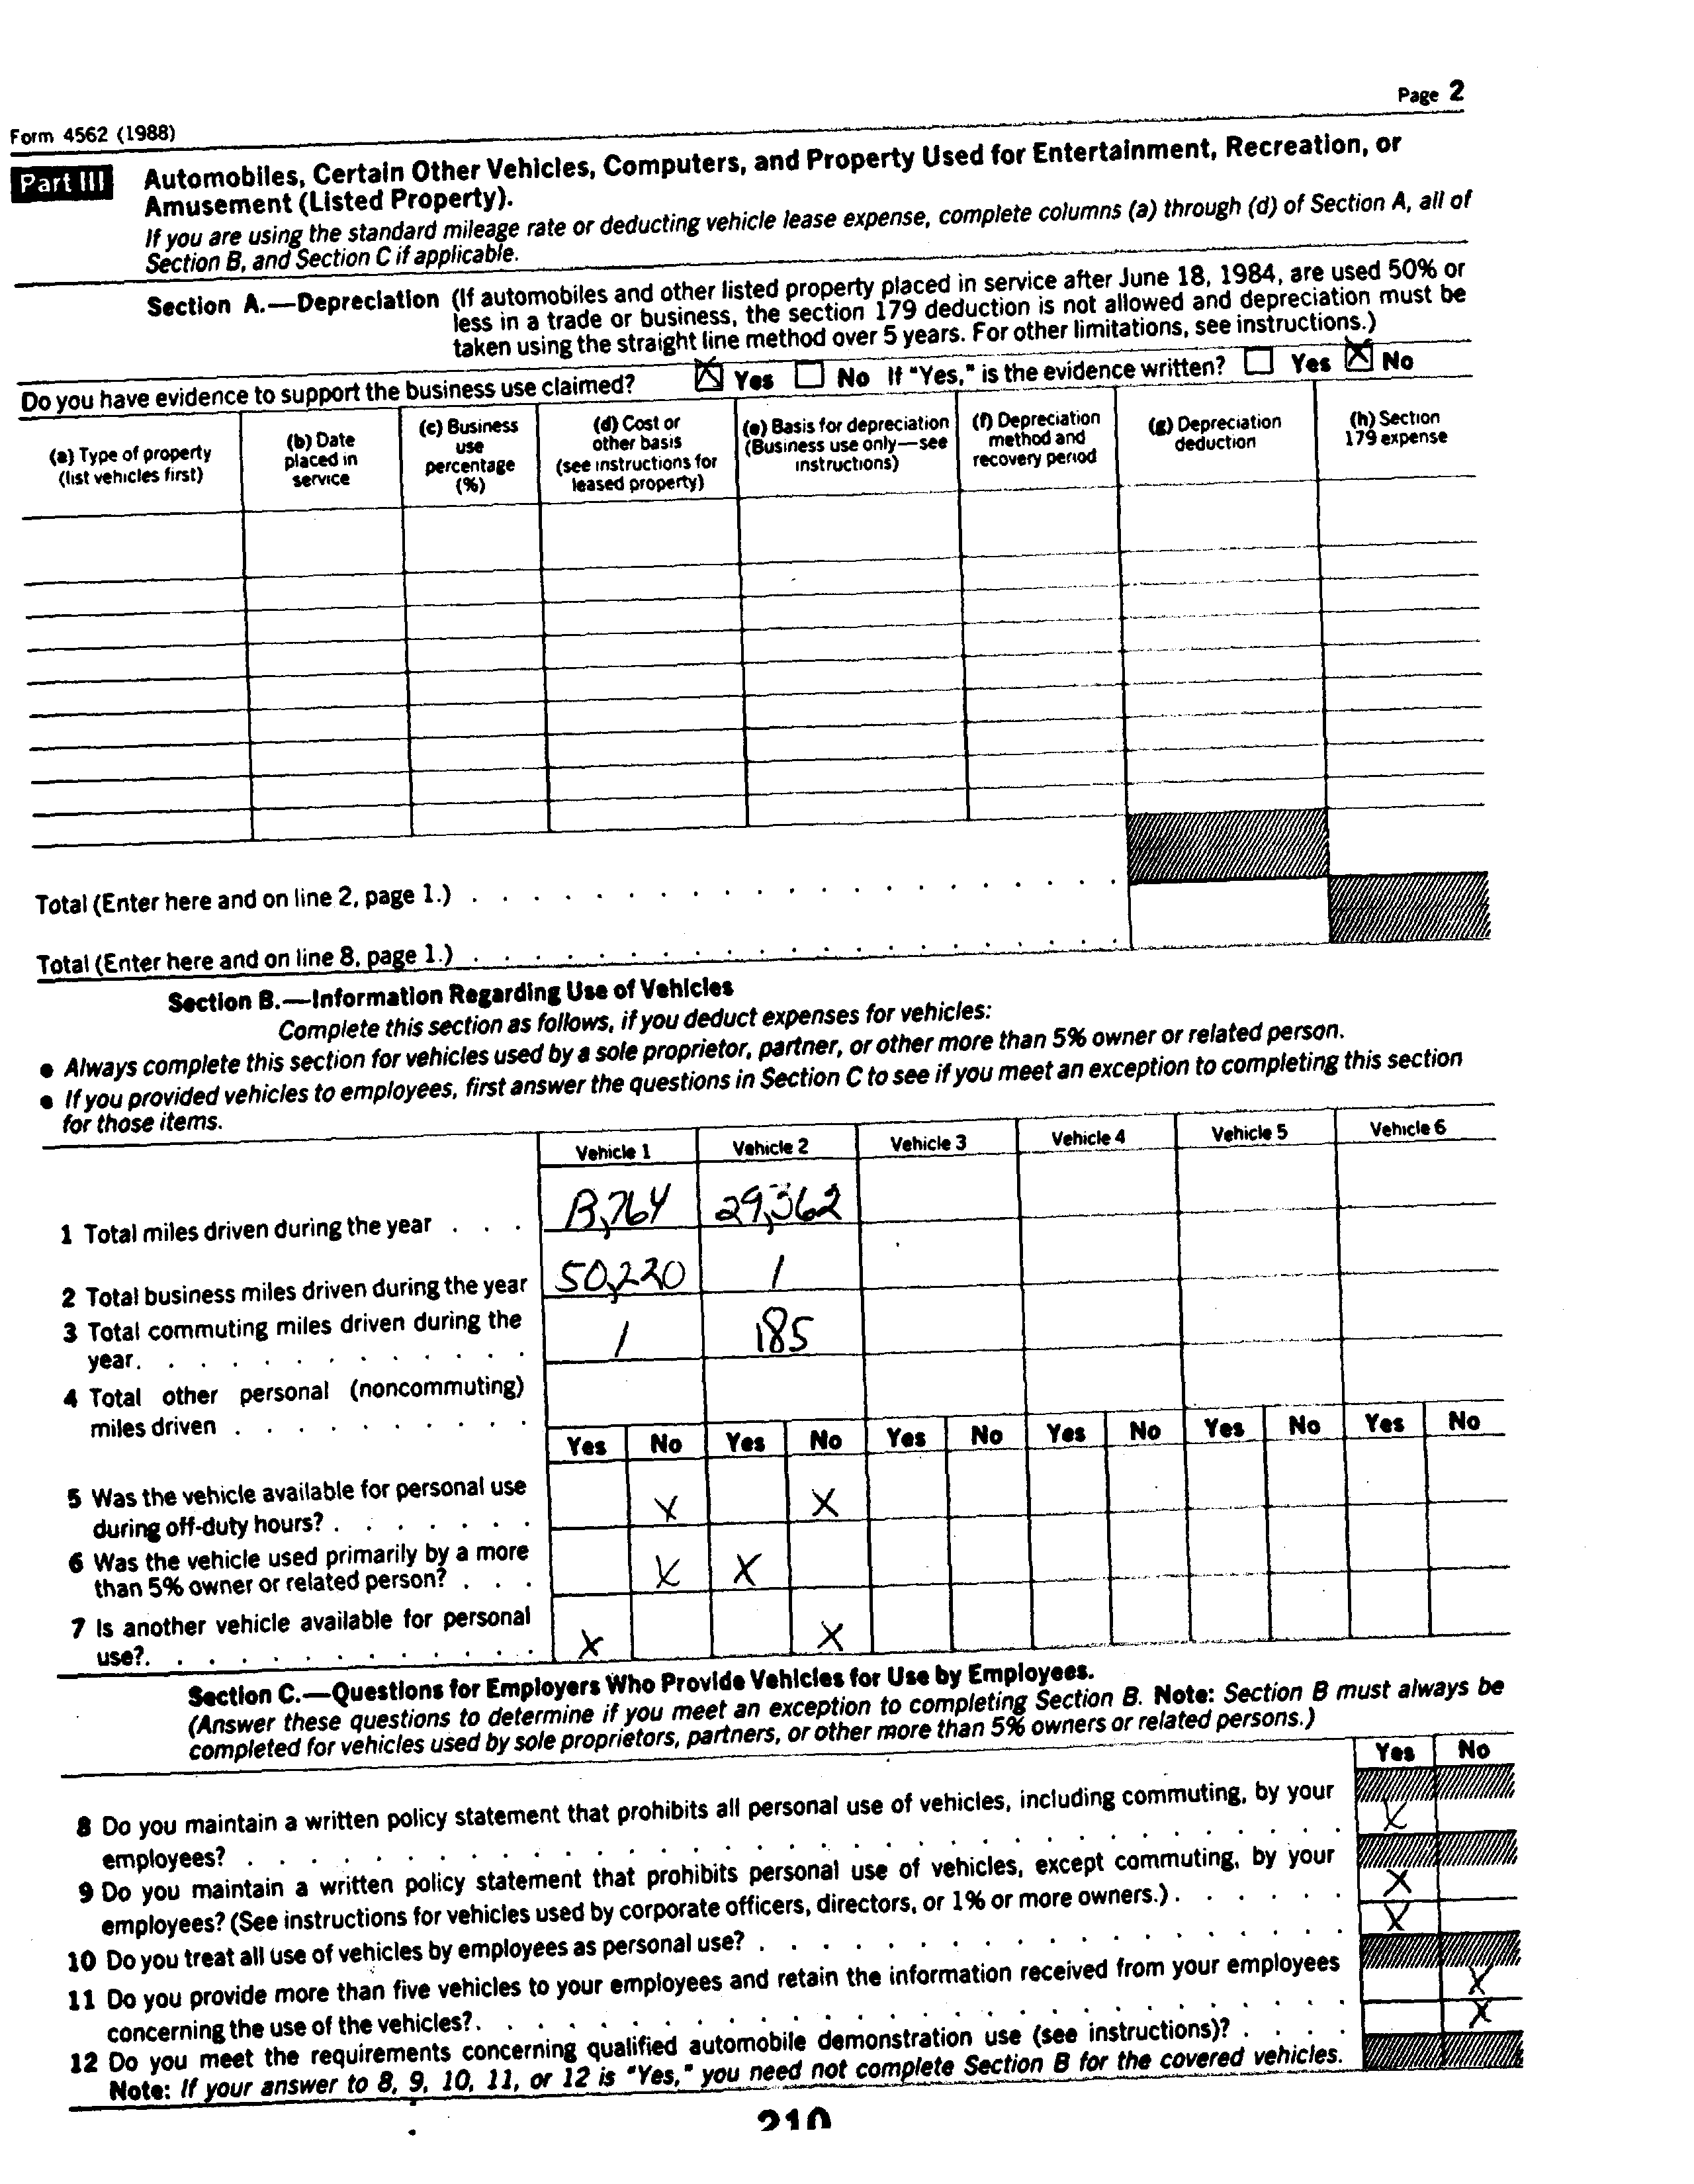

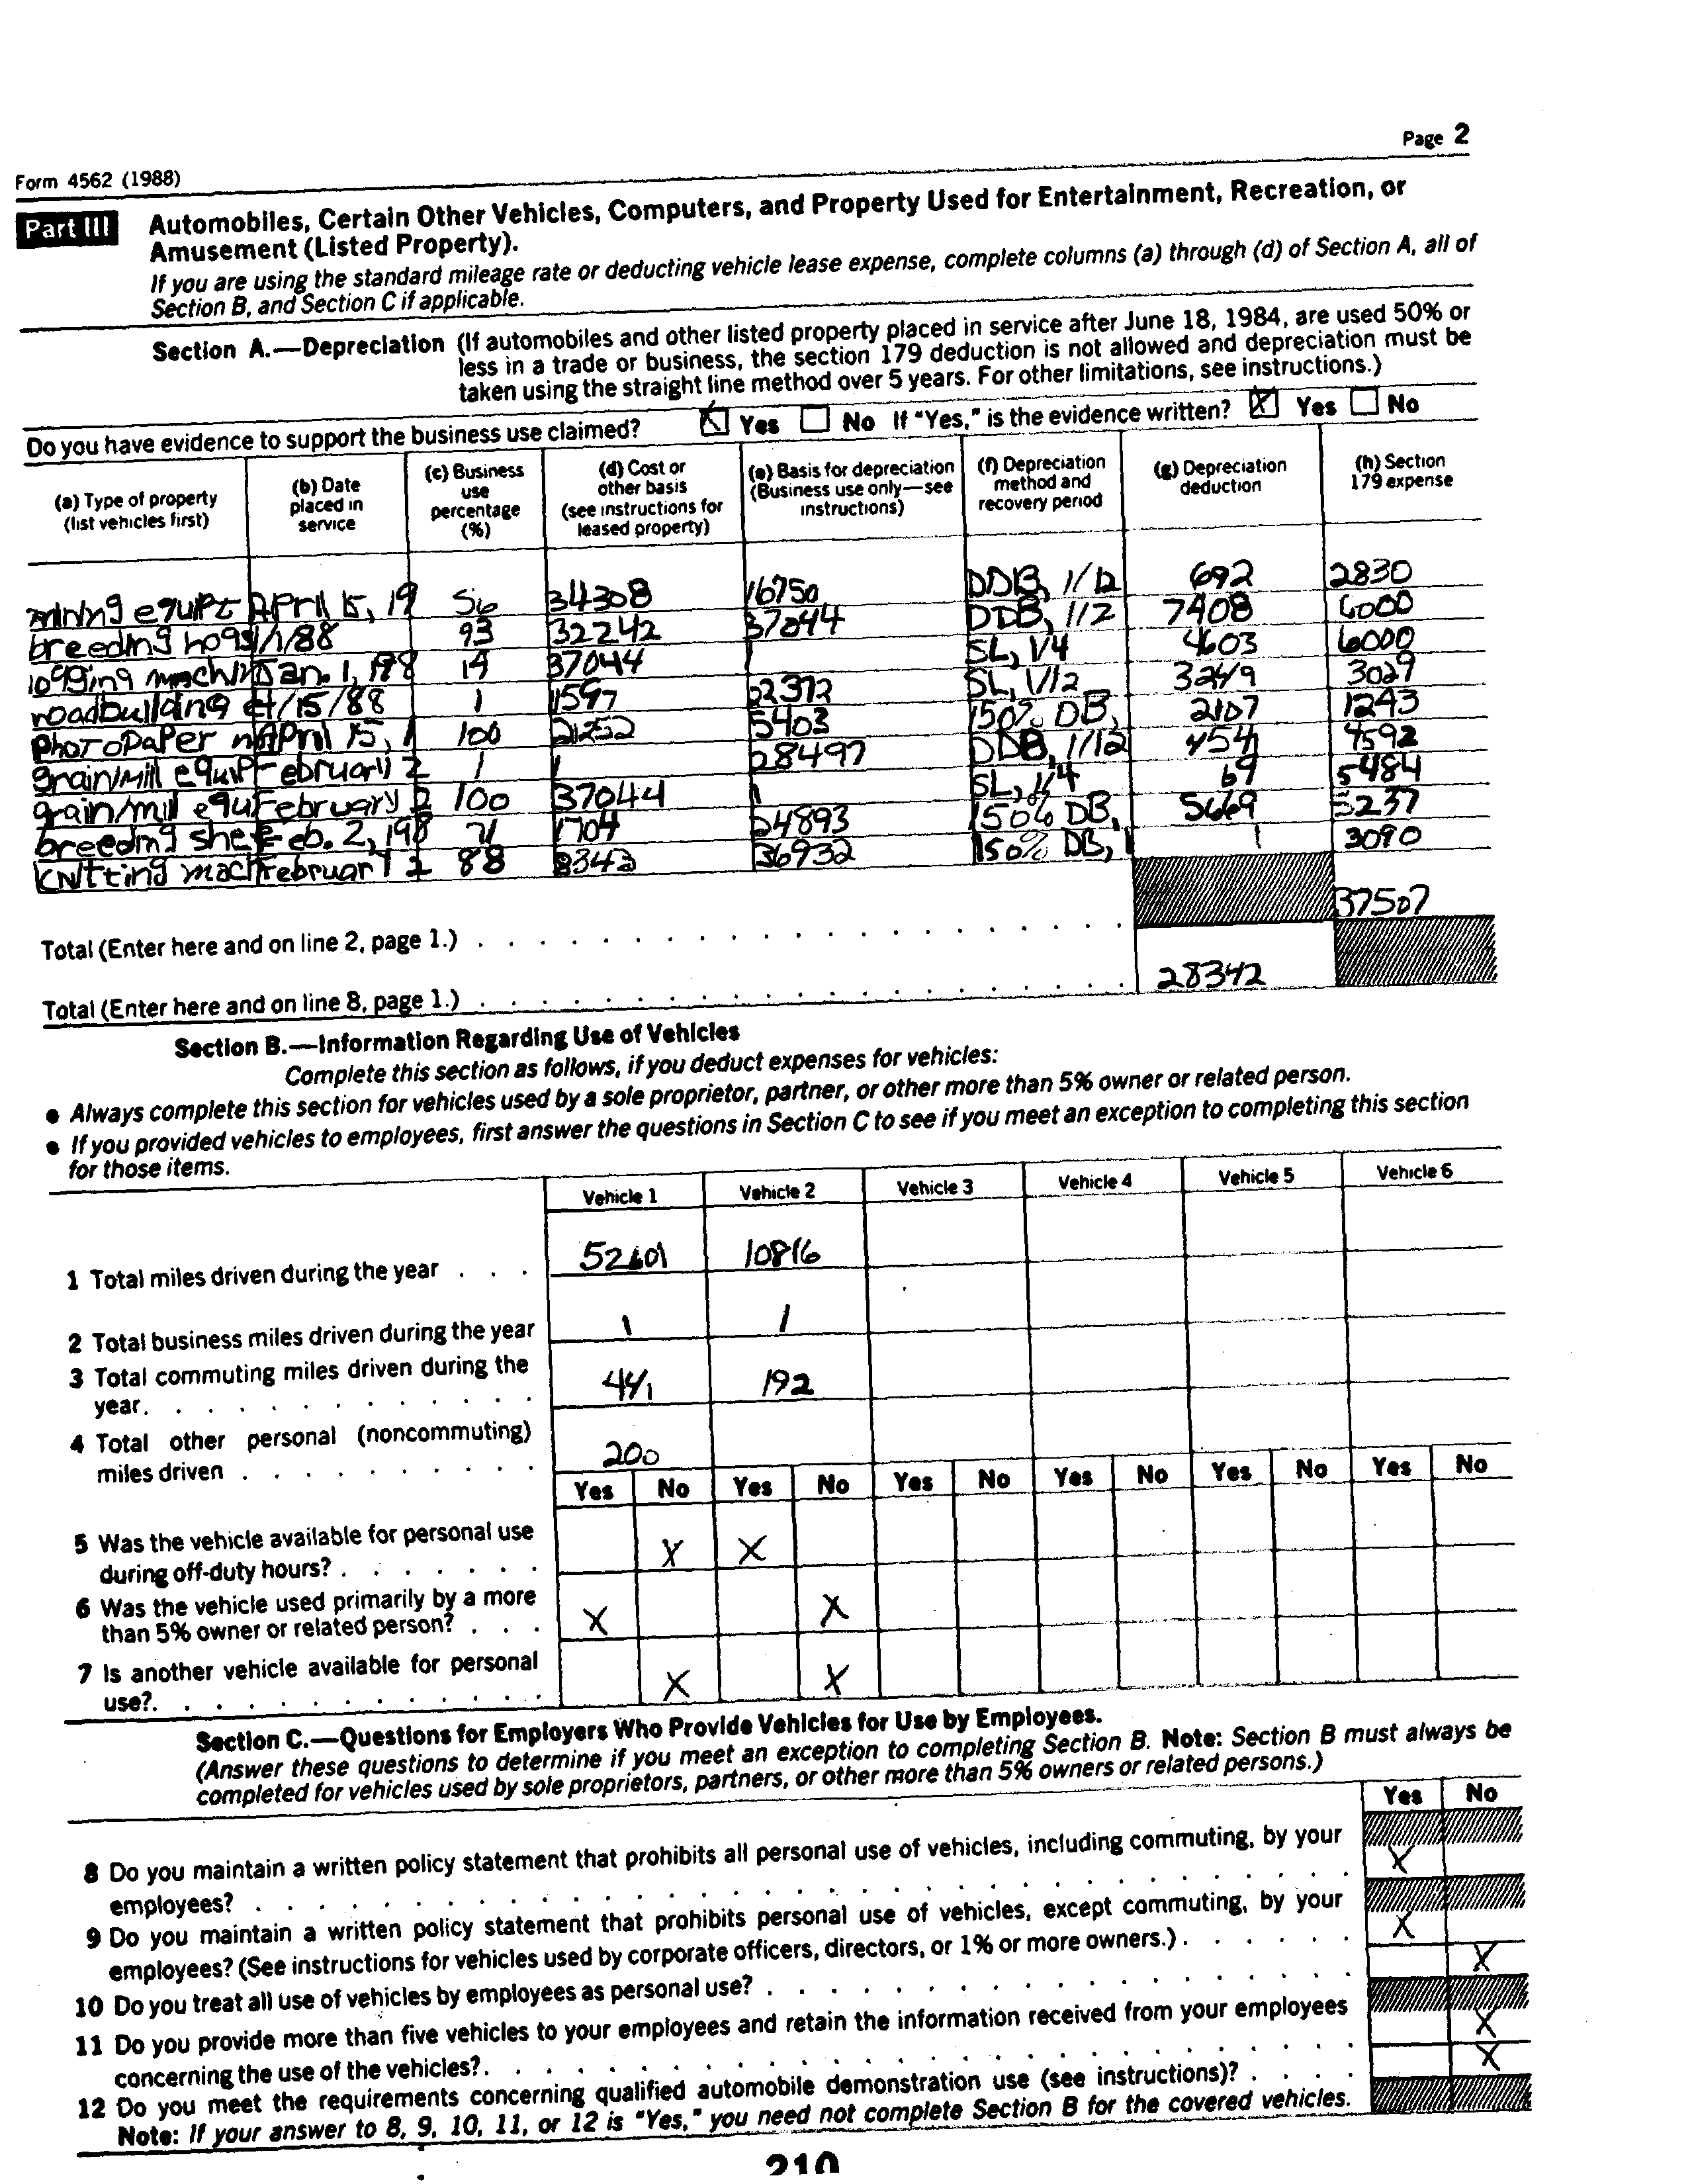

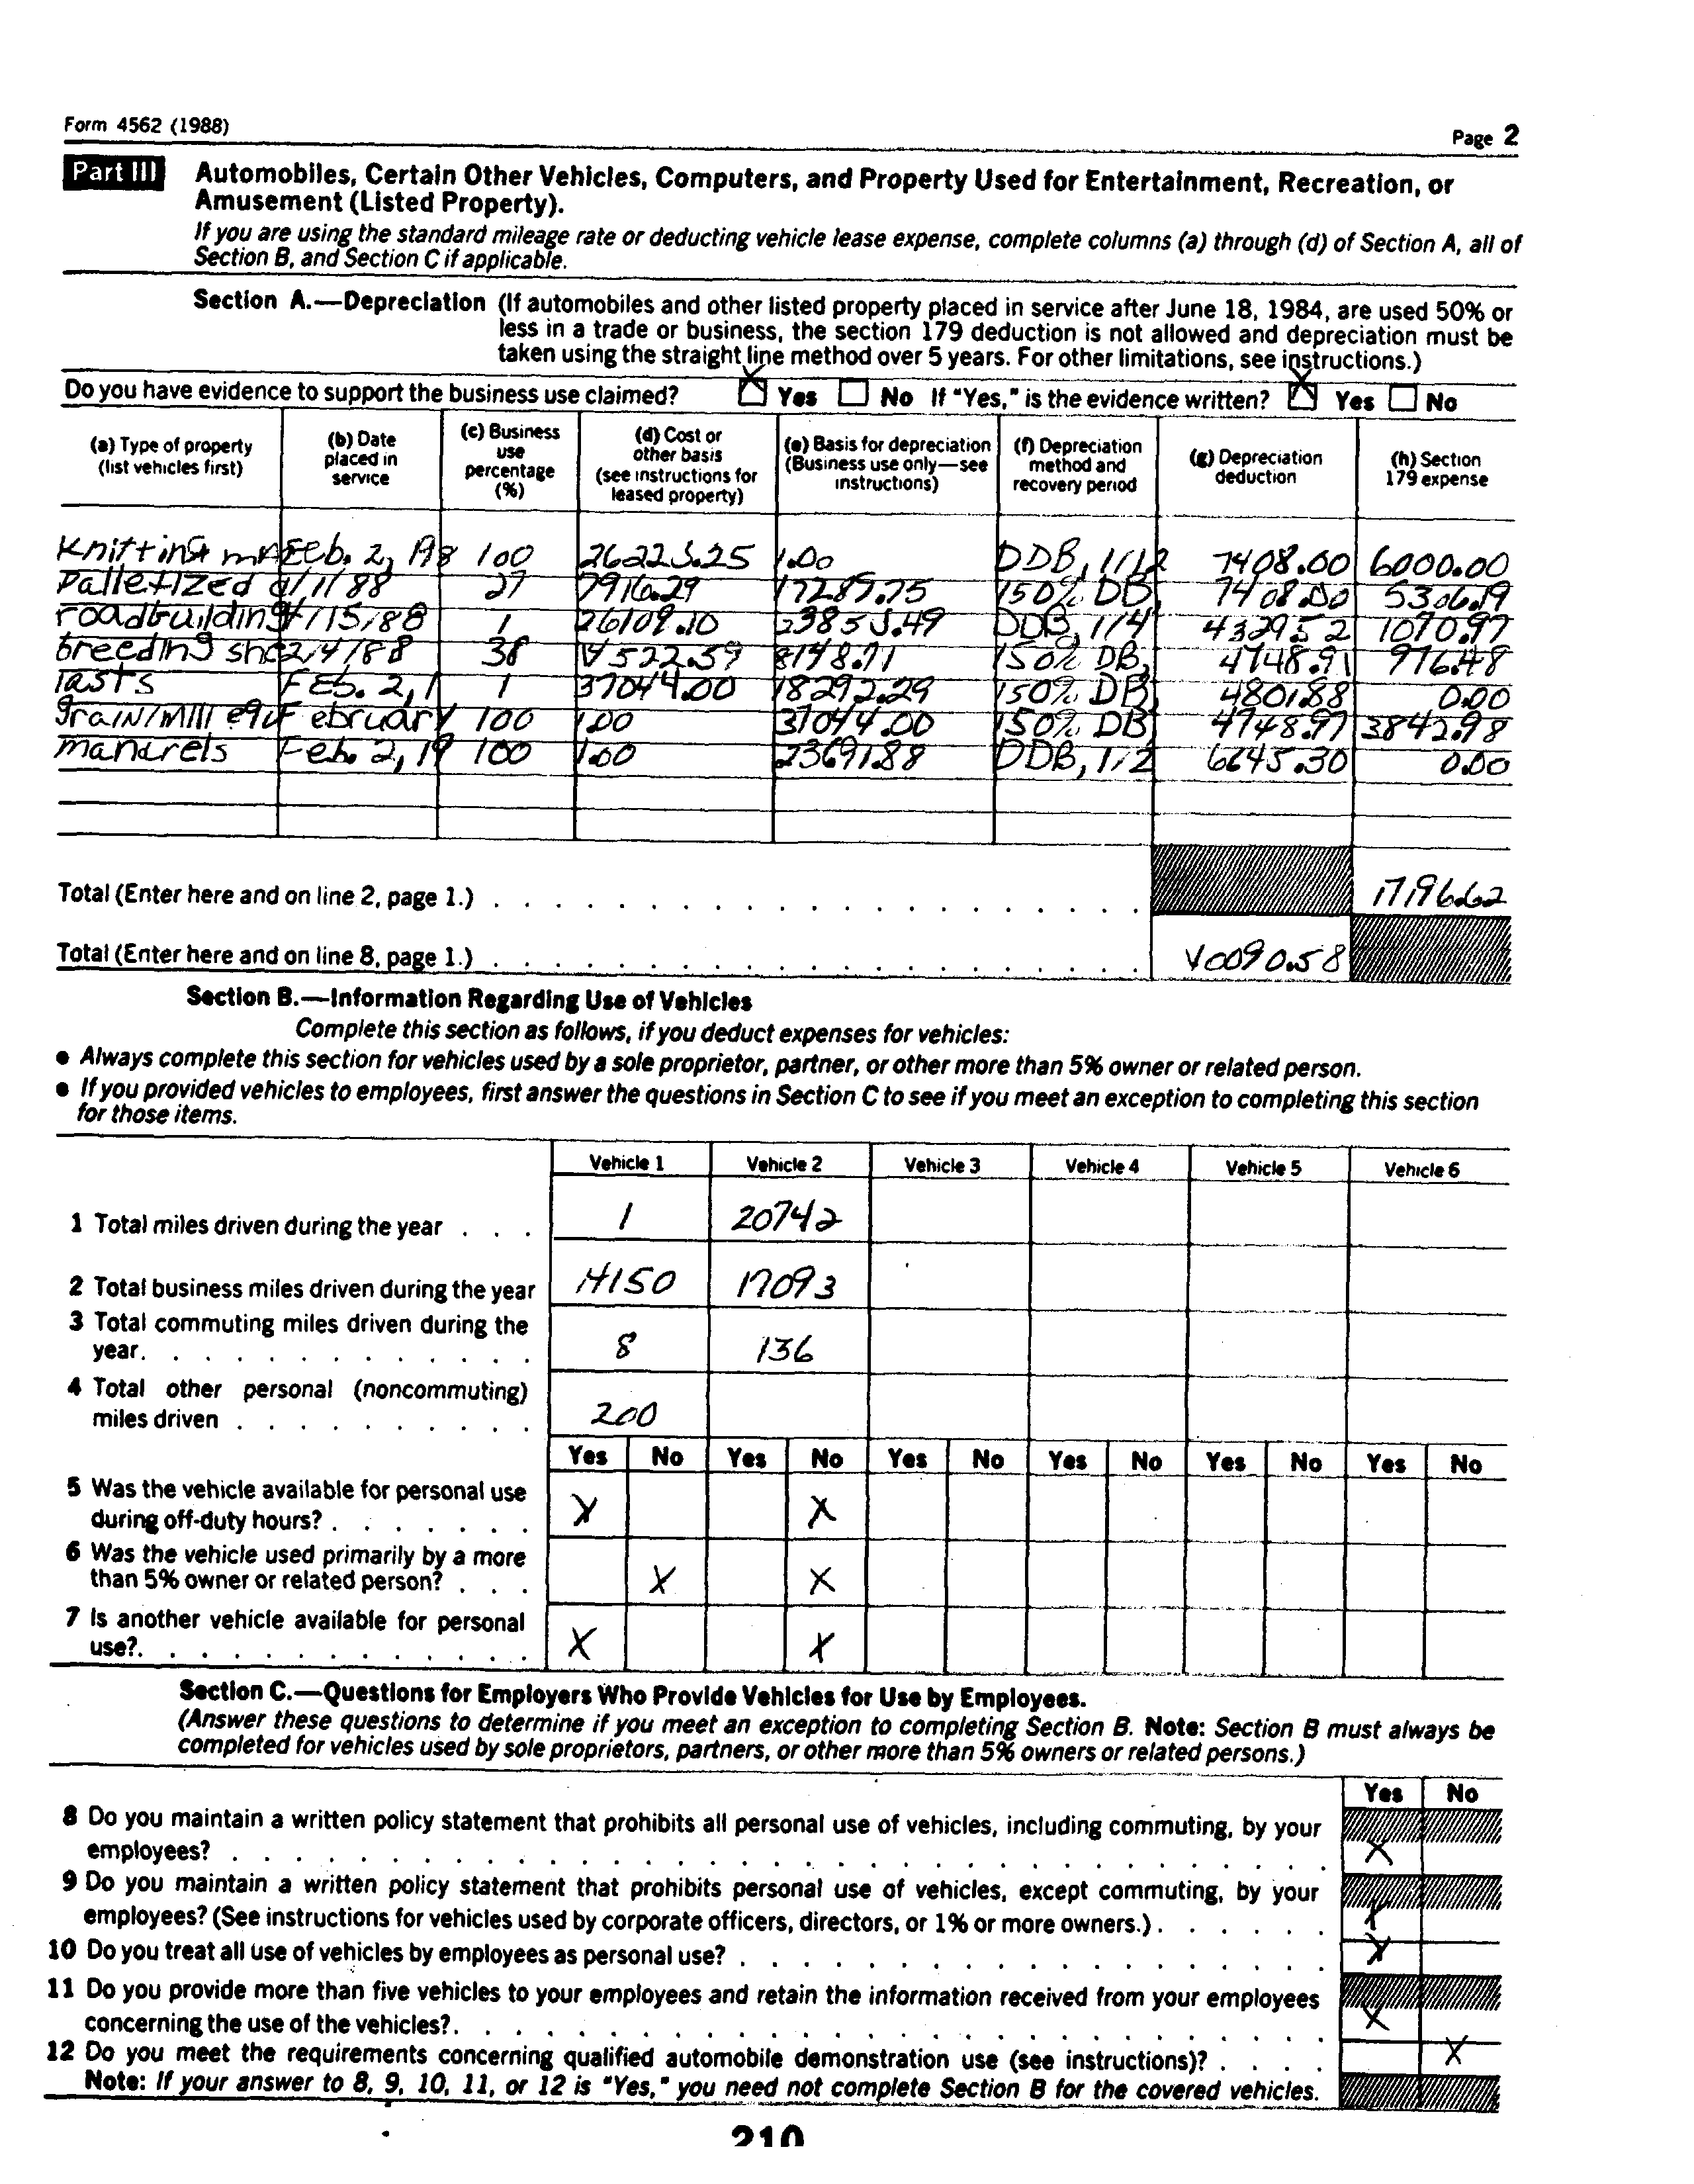

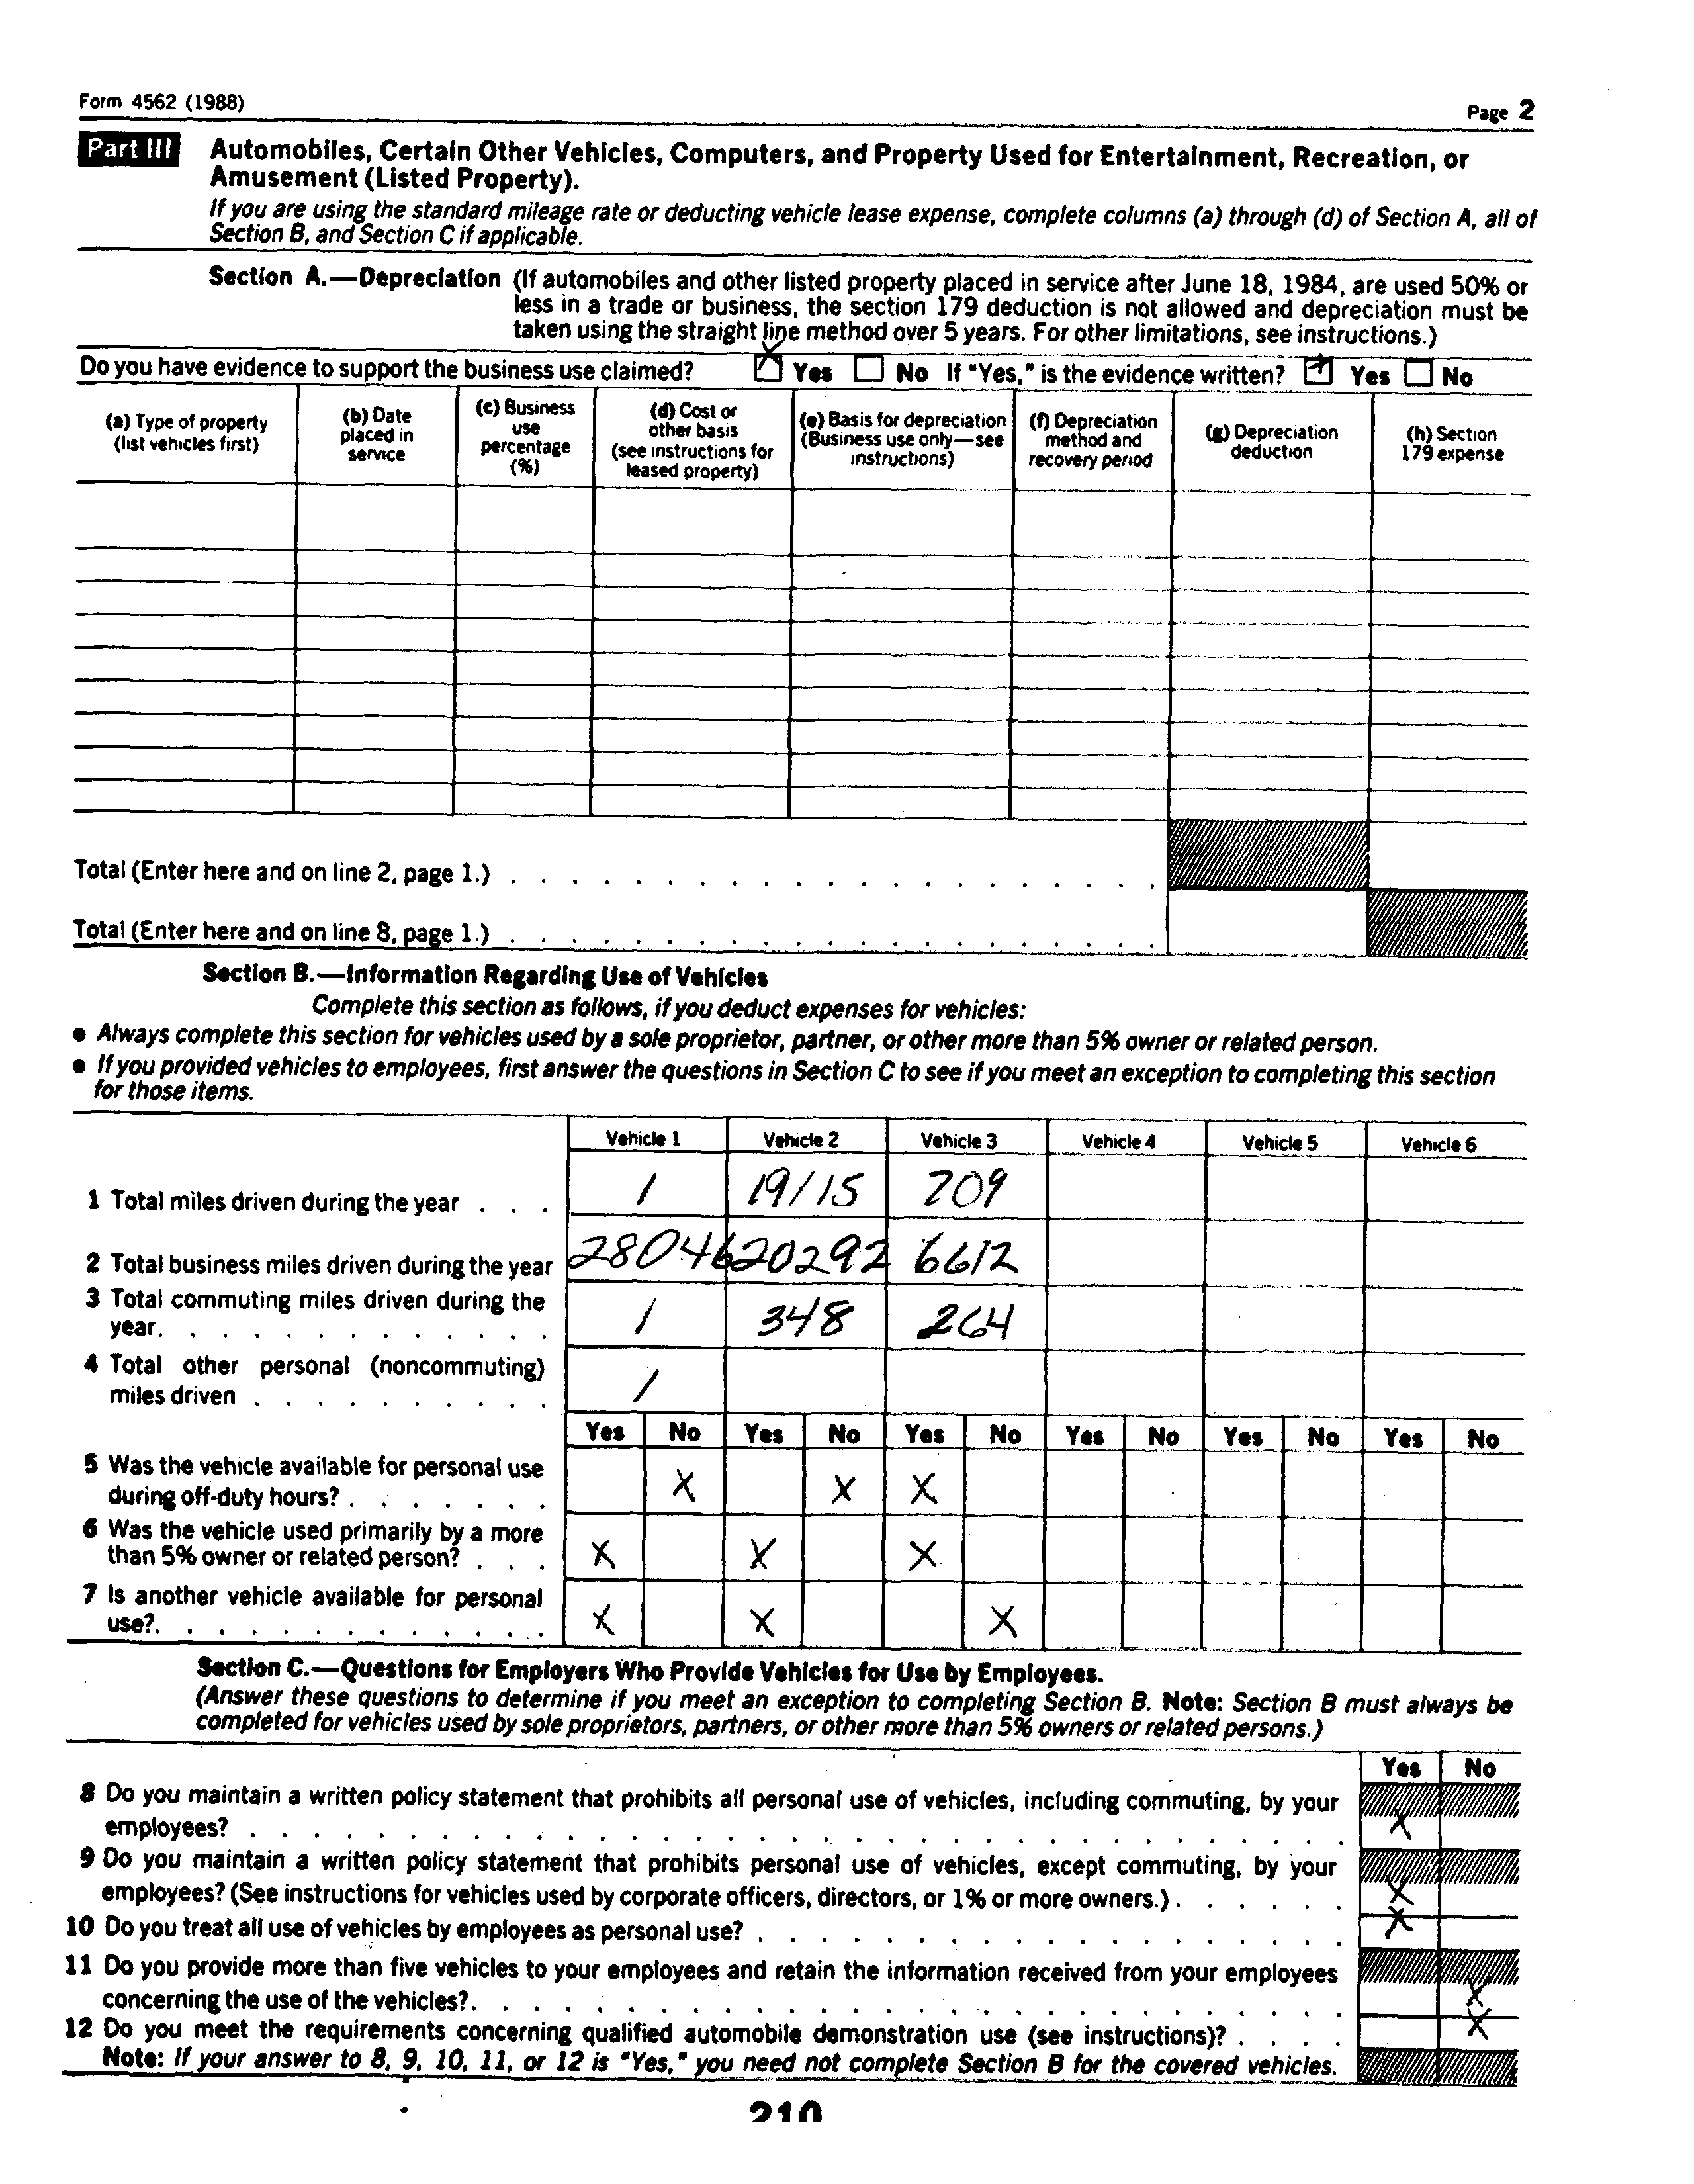

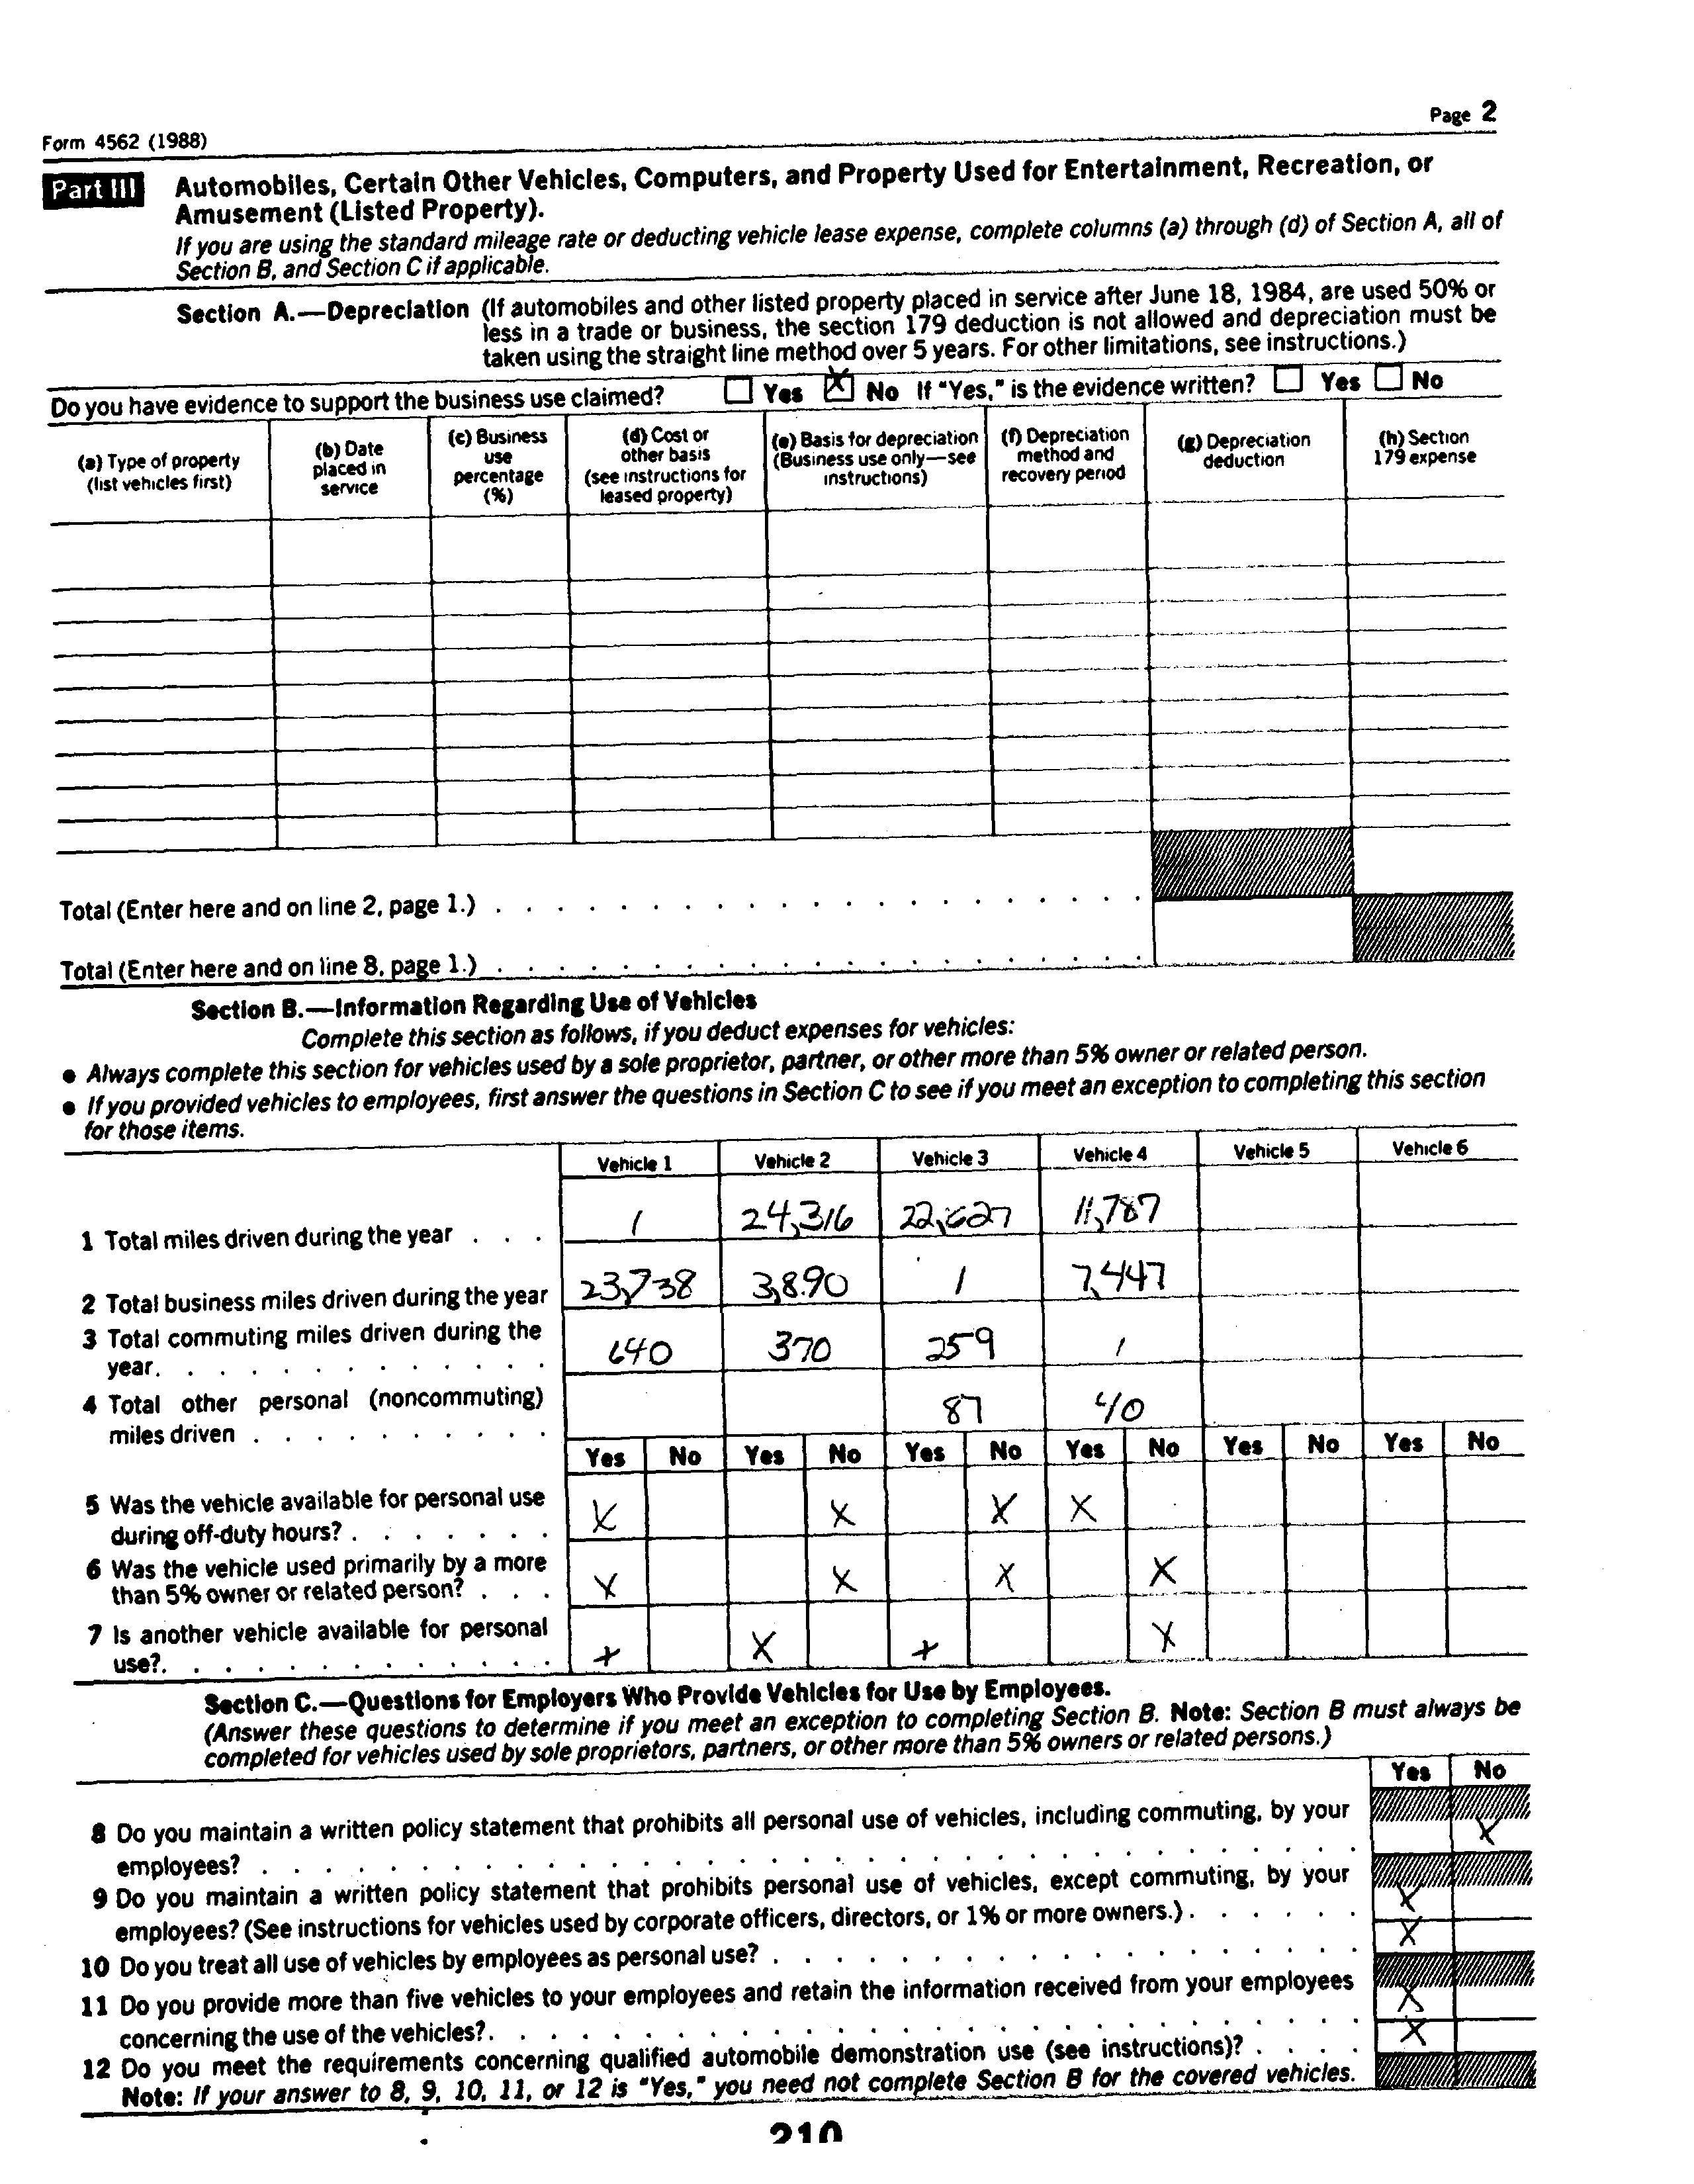

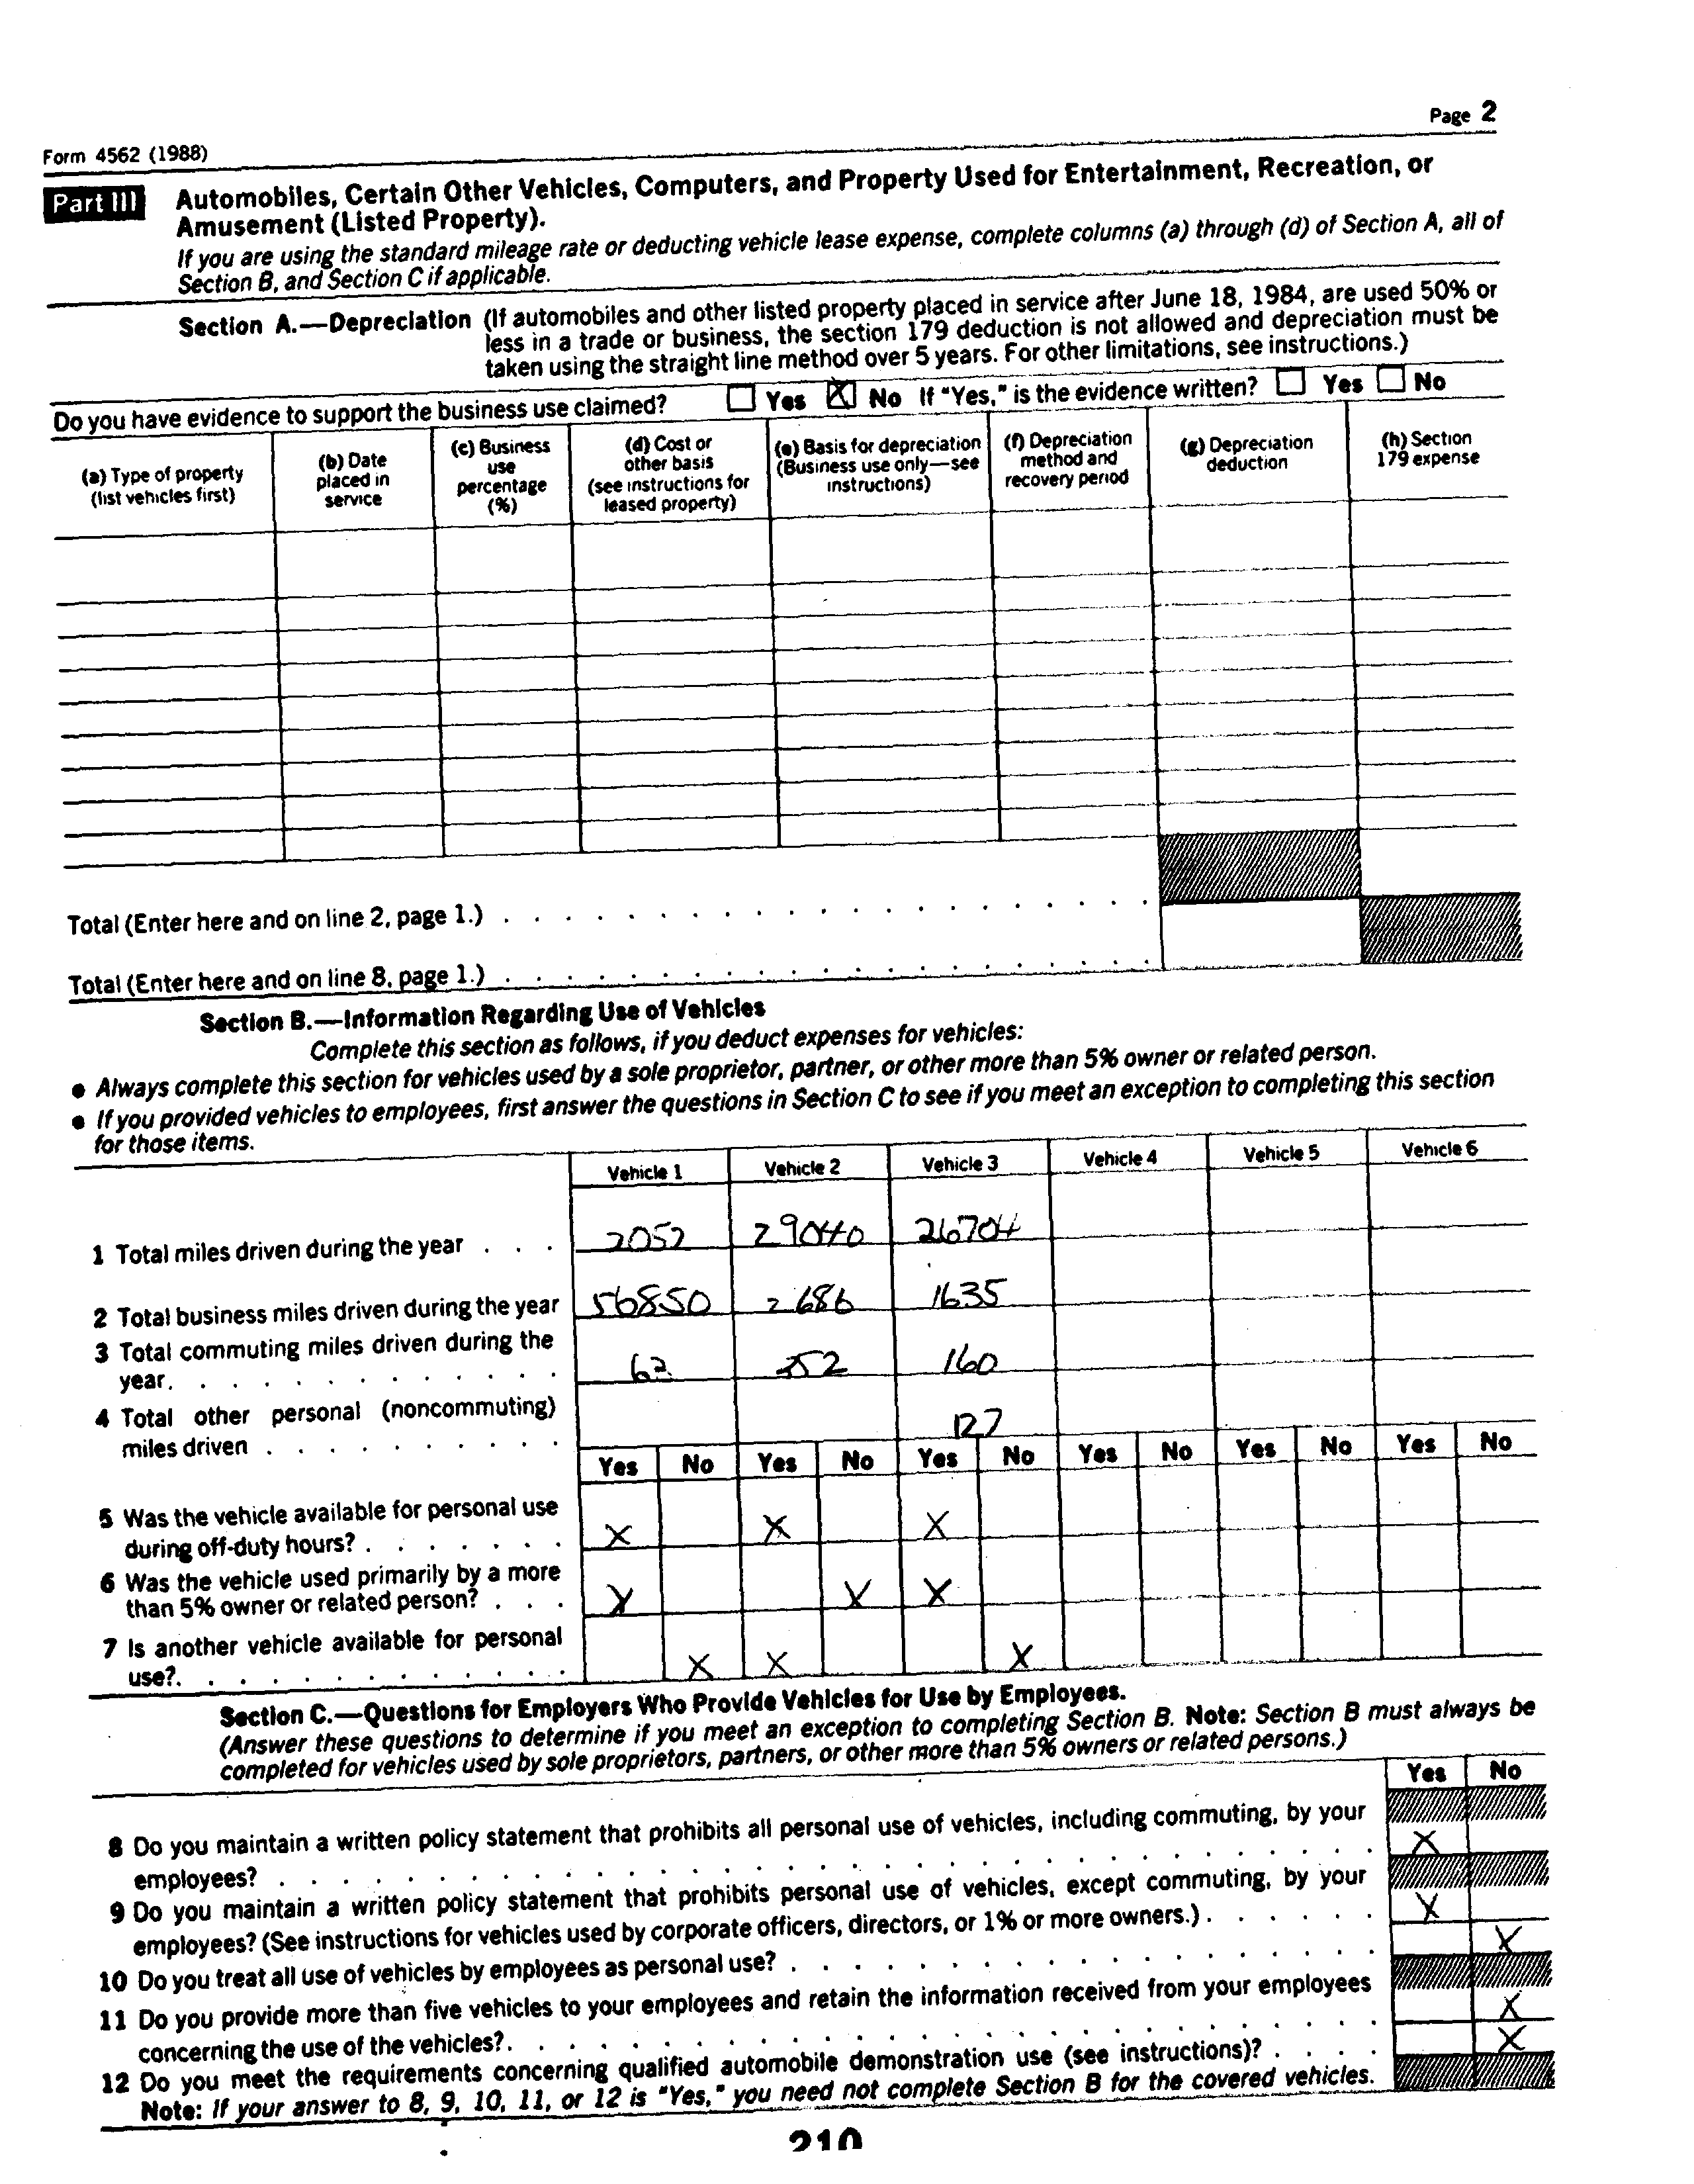

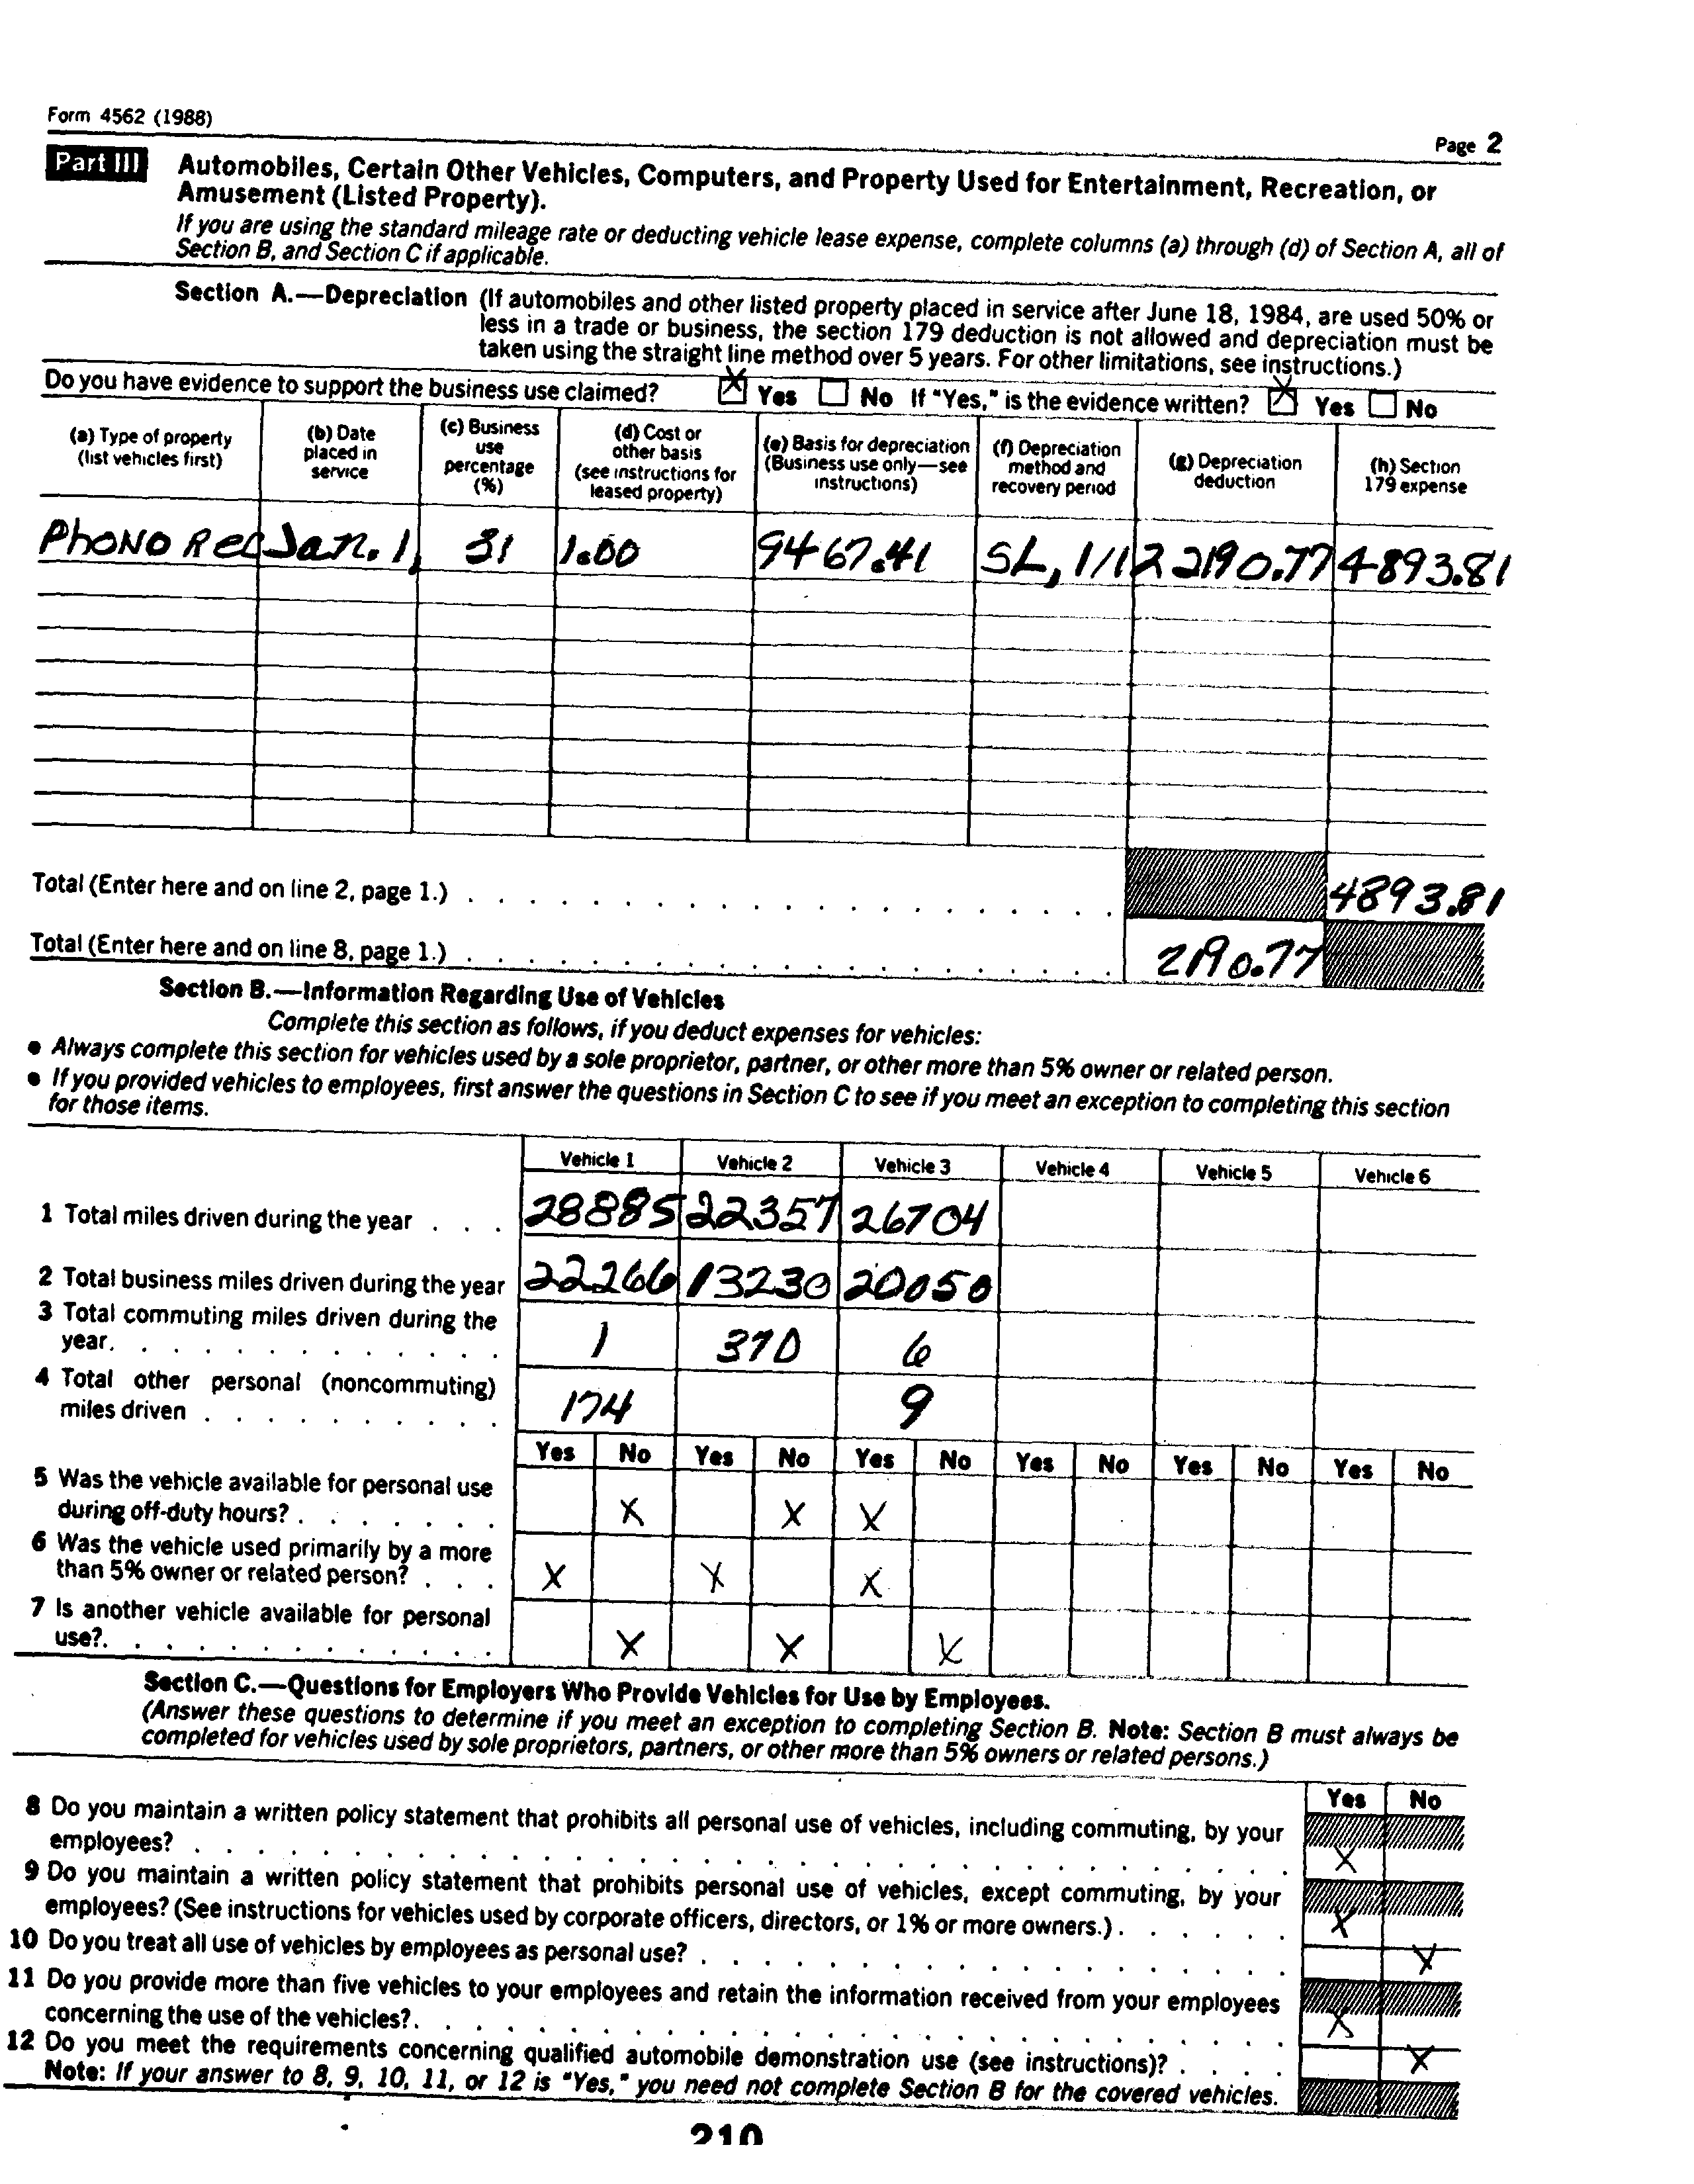

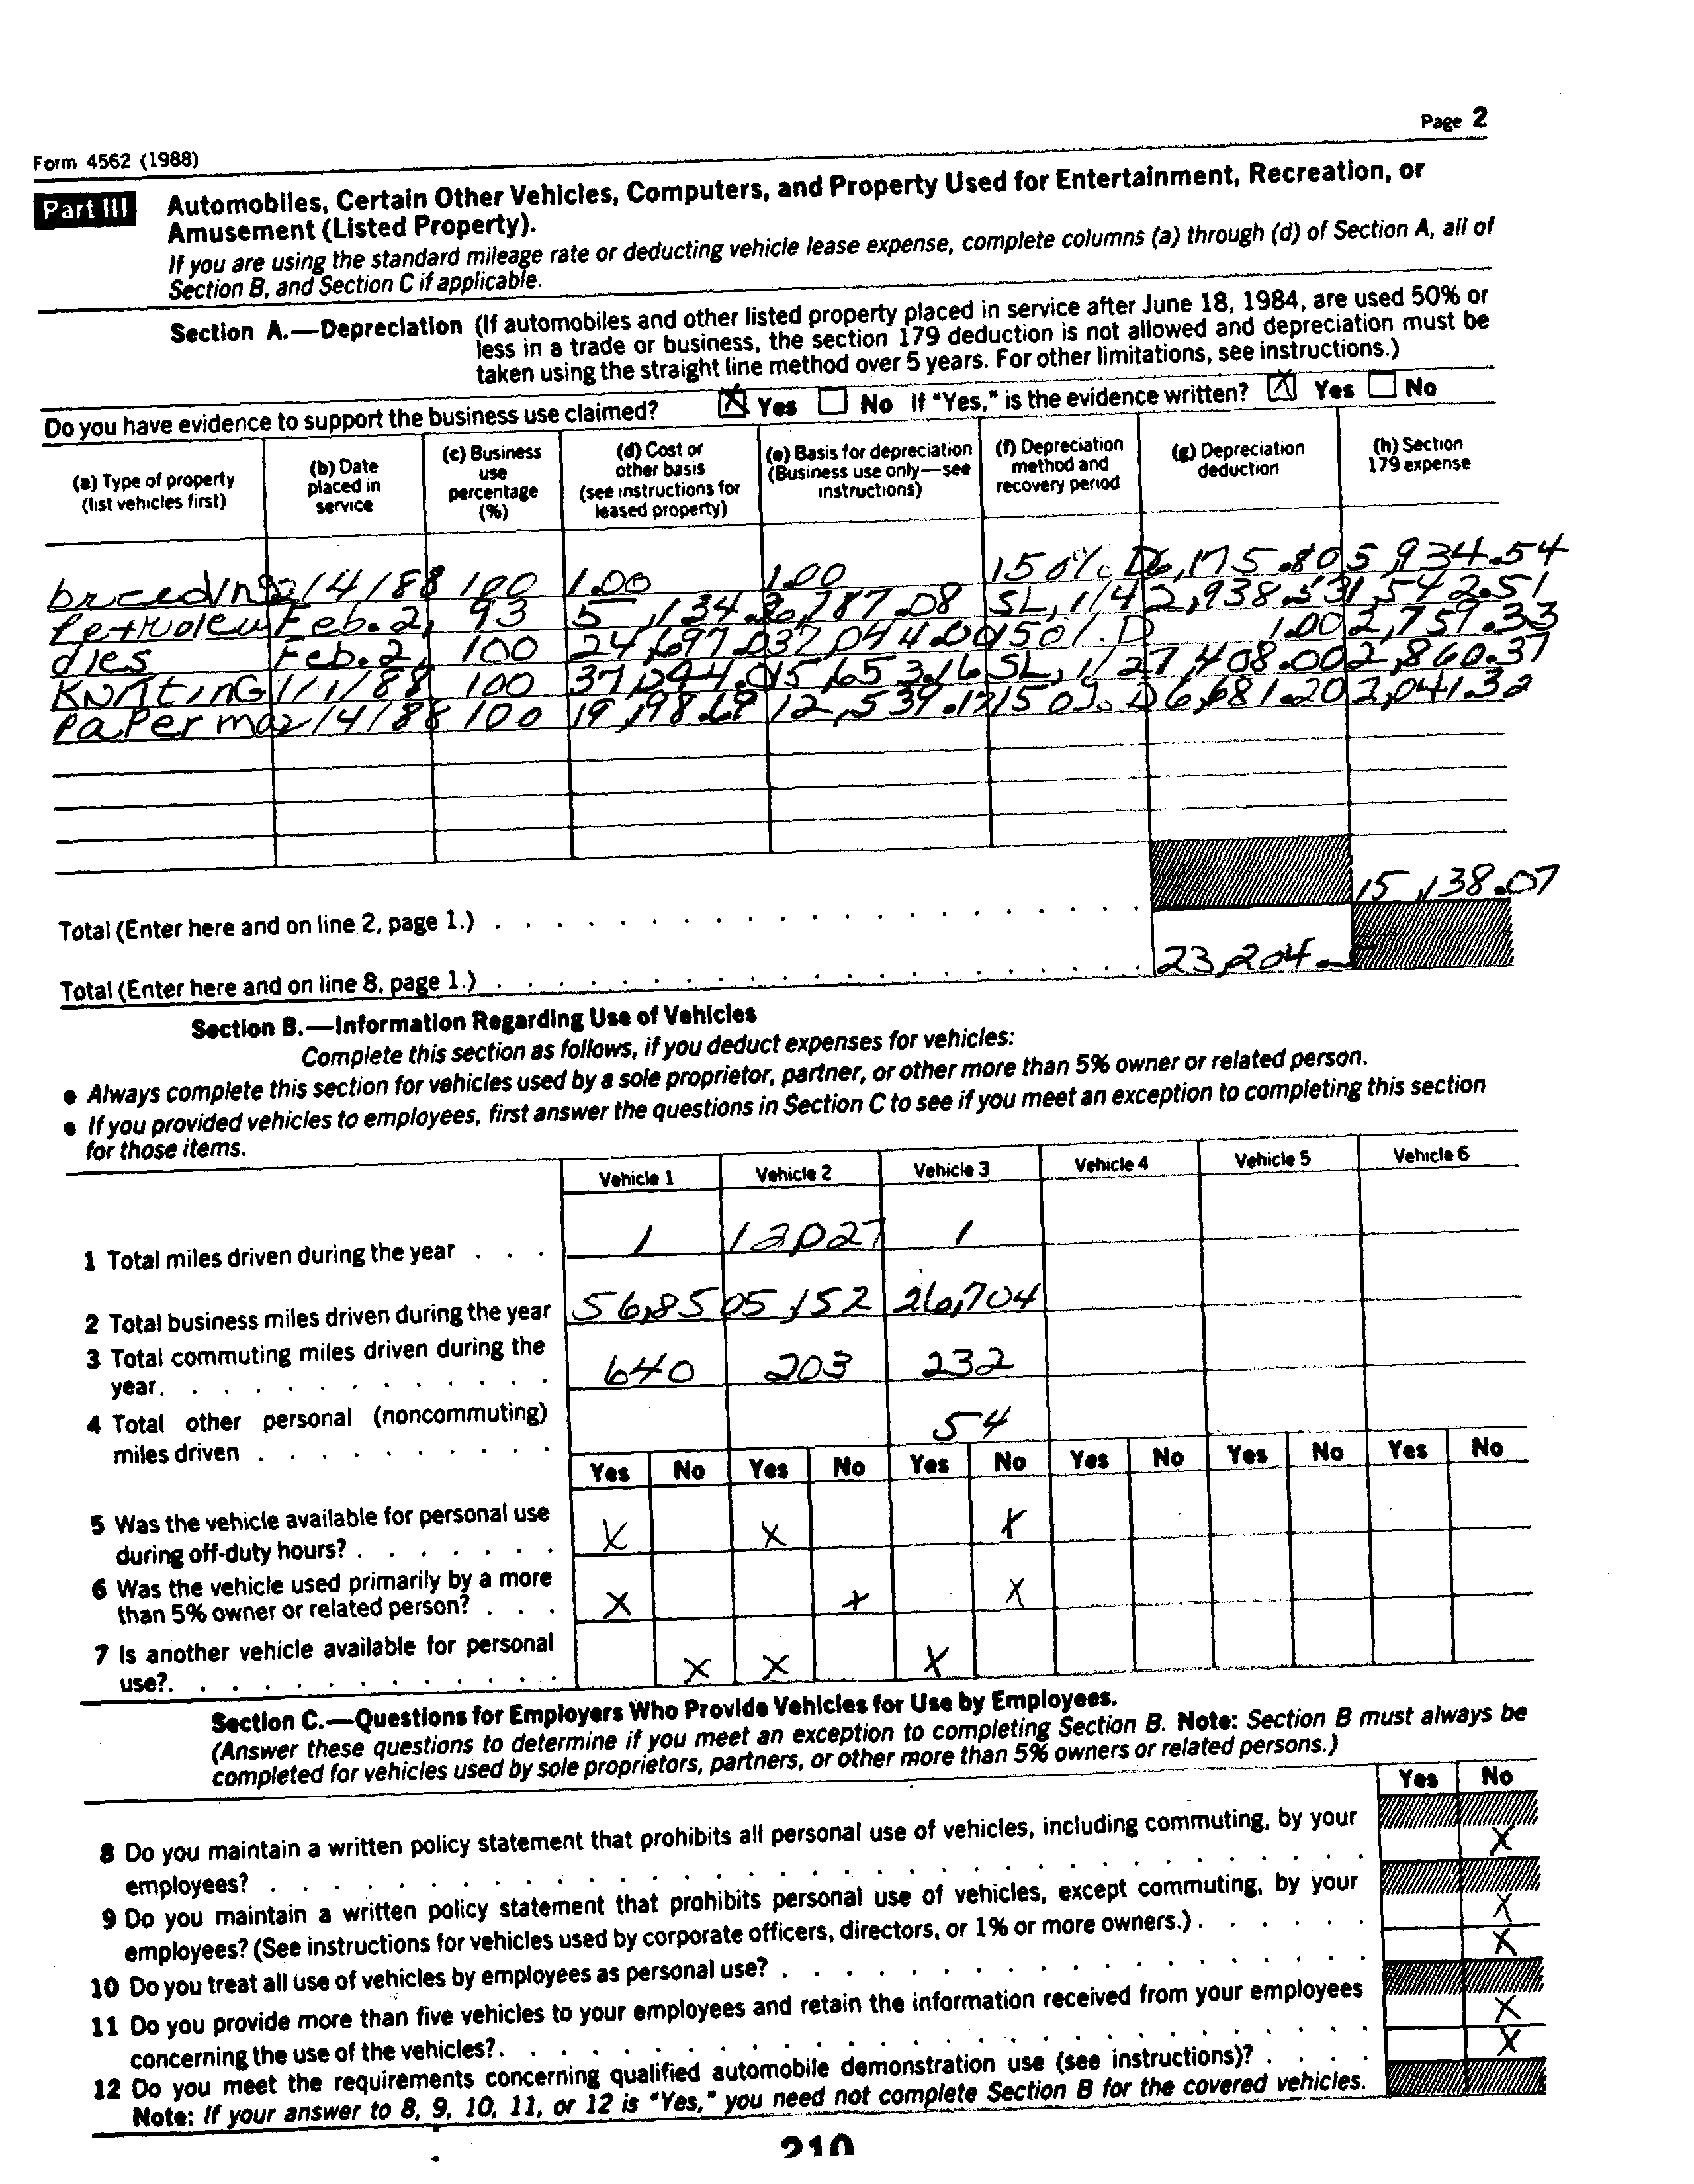

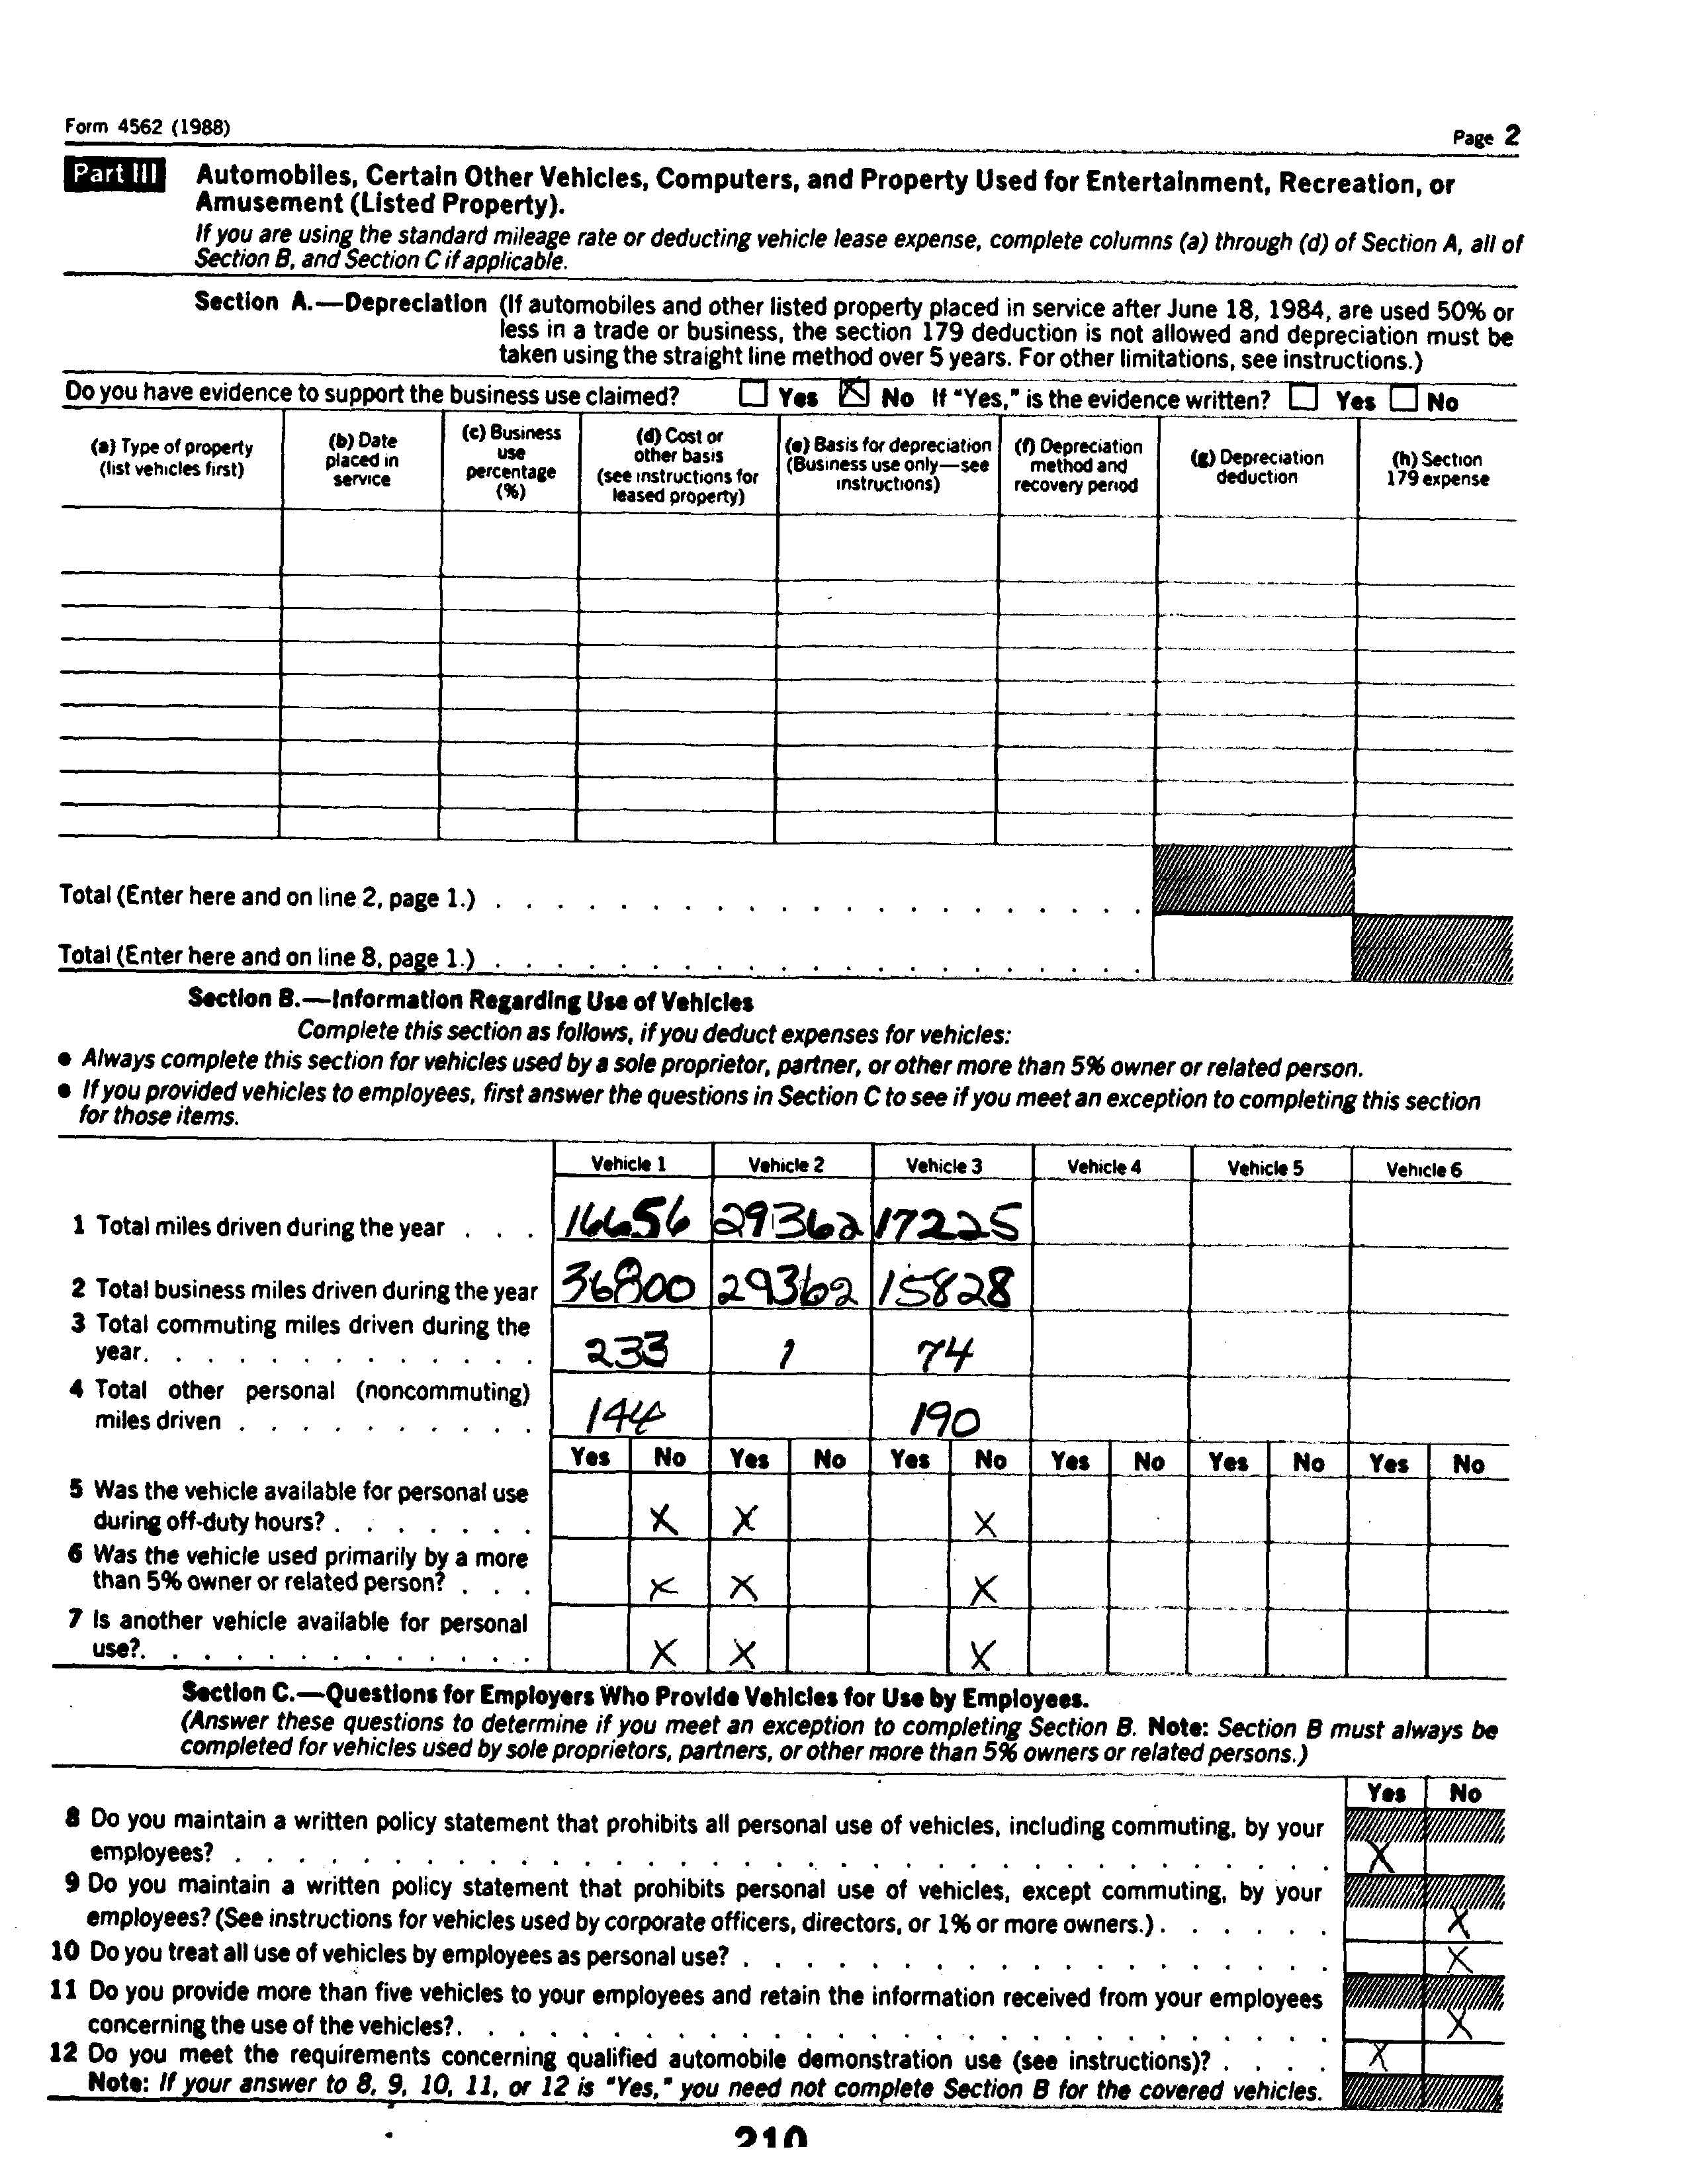

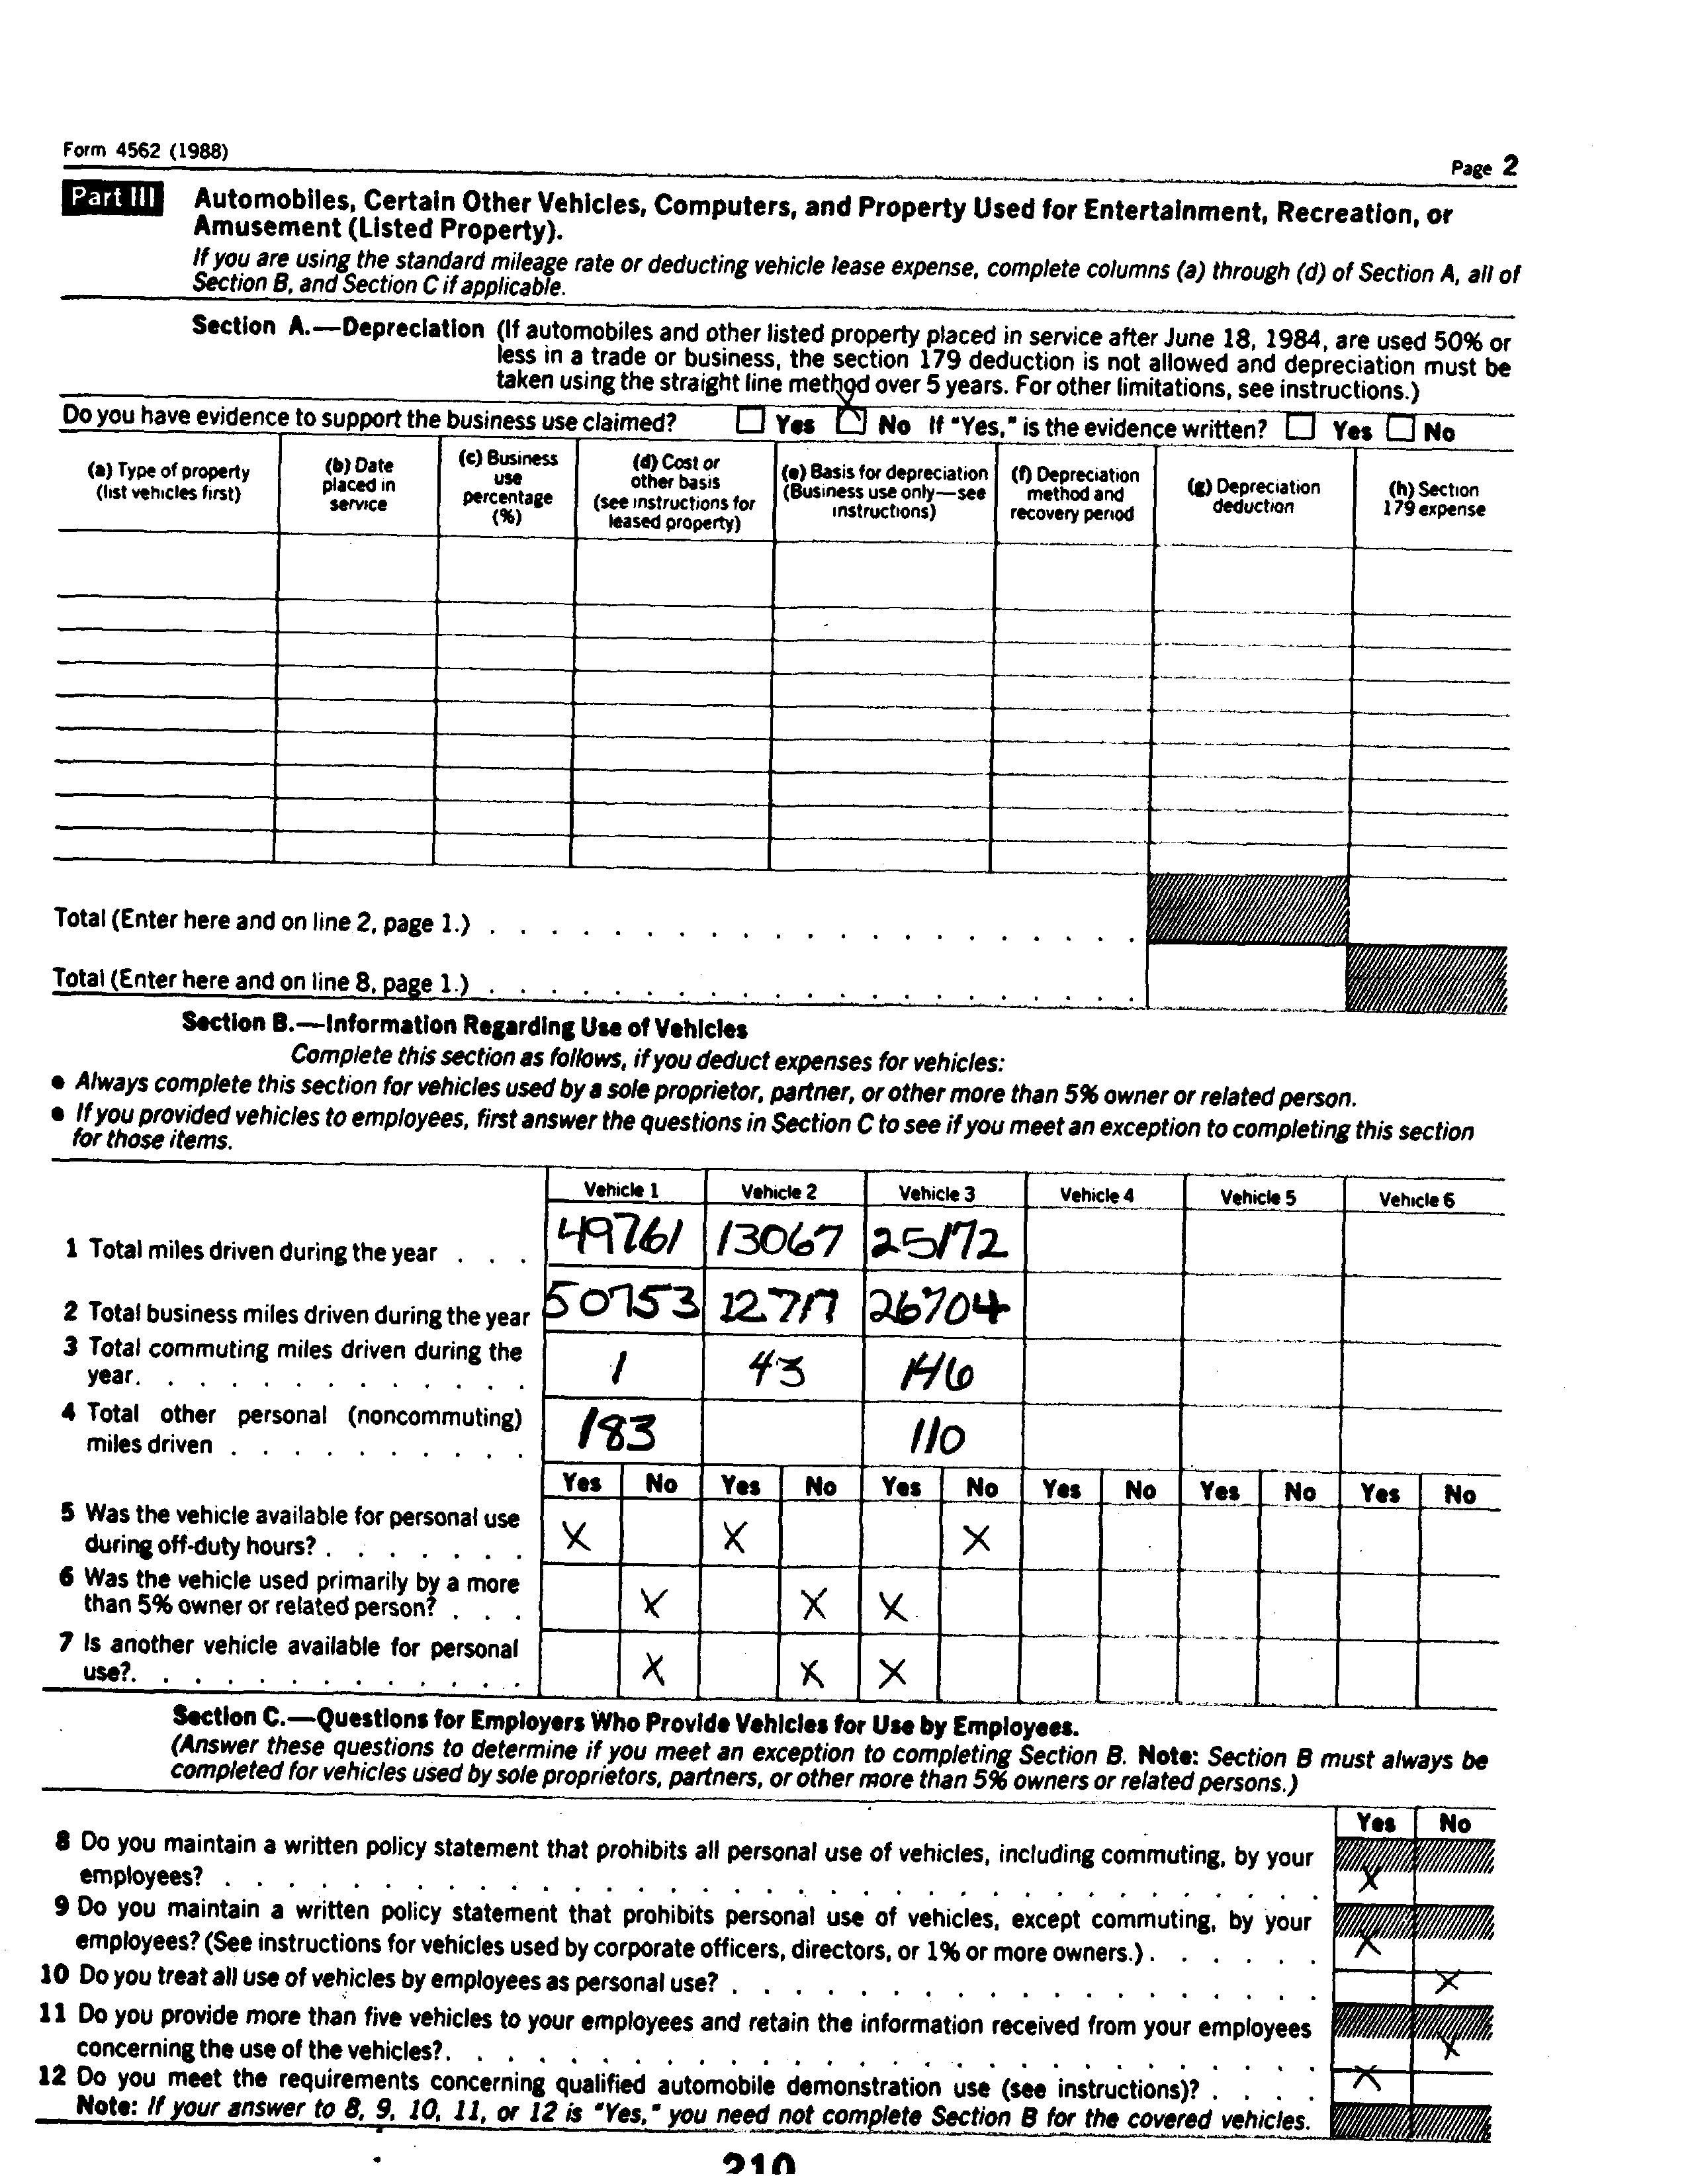

In [27]:
searching = True

while searching:
    search = input("Search (to exit type 'exit'): ")

    if (search == 'exit') or (search == 'Exit'):
        break
    else:
        print('Search: ' + search)
        print()
        result = es.search(
            index="documents",
            body={
                "query": {
                    "multi_match": {
                        "query": search,
                        "fields": ["result"]
                    }
                }
            }
        )
    all_hits = result['hits']['hits']

    for hit in all_hits:
        print("Image:", hit['_source']['image'])
        print()
        display(Image(filename=hit['_source']['image']))
        print("Result:")
        print()
        print(hit['_source']['result'])
        print()


## Voila!
#### Challenge Questions

##### What useful things could this technology be used for?

##### What else could be done to further this technology?


